# **Análise de Vendas da Adidas - 2020 e 2021**

Este projeto analisa o desempenho de vendas da Adidas nos anos de 2020 e 2021, com foco em identificar tendências de consumo e os impactos da pandemia de COVID-19 no varejo.

A crise sanitária de 2020 afetou significativamente o comportamento dos consumidores e a operação das empresas. No primeiro semestre, restrições e fechamentos de lojas físicas reduziram as vendas presenciais, enquanto as compras online ganharam força. O objetivo deste estudo é compreender essas mudanças e avaliar como as vendas evoluíram ao longo do período.

### **Etapas do Projeto**

1. **Importação de Dados**: Carregamento e pré-processamento dos dados.
2. **Tratamento de Dados**: Limpeza e organização para análise
3. **Análise Exploratória de Dados (EDA)**: Visualização e identificação de padrões
4. **Análise Descritiva (Estatística)**: Estatísticas e testes para validar hipóteses

Os dados foram obtidos no Kaggle e estão armazenados em um arquivo Excel, contendo informações detalhadas sobre vendas da Adidas.

### **Ferramentas Utilizadas**

- **Pandas e Numpy**: Manipulação e tratamento dos dados.
- **Seaborn e Matplotlib**: Visualização gráfica.
- **Scipy**: Testes estatísticos e análises avançadas.
- **Cycler**: Personalização de cores nos gráficos.
- **Scikit-learn (sklearn.preprocessing)** – Padronização e normalização dos dados para modelagem estatística e machine learning.  

In [1]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

from src.estatistica import composicao_histograma_boxplot
from src.estatistica import tabela_distribuicao_frequencias
from cycler import cycler
from matplotlib.ticker import PercentFormatter
from scipy.interpolate import interp1d
from scipy.stats import chi2_contingency
from scipy.stats import linregress
from scipy.stats.mstats import winsorize
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler

# Definição das paletas de cores
cores = plt.get_cmap('Accent').colors
ciclo_cores = cycler('color', cores)
plt.rc('axes', prop_cycle=ciclo_cores)

DADOS = r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\dados\adidas_us_sales_datasets.xlsx"
df_adidas = pd.read_excel(DADOS)

df_adidas.head()

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,NaN,NaN,Adidas Sales Database,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
4,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store


### **Pré-processamento e Limpeza**

Antes da análise, foi necessário realizar algumas transformações para estruturar melhor os dados:

1. **Ajuste do Cabeçalho** – A linha 3 do arquivo continha os nomes corretos das colunas, então ela foi definida como cabeçalho do DataFrame.
2. **Remoção de Linhas Não Relevantes** – Linhas anteriores ao cabeçalho e outras informações desnecessárias foram eliminadas.
3. **Exclusão de Colunas Vazias** – Colunas contendo apenas valores NaN foram removidas.
4. **Remoção da Coluna ‘Retailer ID’** – Essa coluna não era relevante para a análise e foi descartada.
5. **Conversão de Datas** – A coluna Invoice Date foi convertida para o formato YYYY-MM-DD, garantindo consistência para análises temporais.

In [2]:
# Definir a linha 3 como cabeçalho (nomes das colunas)
df_adidas.columns = df_adidas.iloc[3]

# Remover as linhas antigas, incluindo a nova linha de cabeçalho
df_adidas = df_adidas.iloc[4:].reset_index(drop=True)

In [3]:
df_adidas.head()

3,NaN,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01 00:00:00,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.5,In-store
1,NaN,Foot Locker,1185732,2020-01-02 00:00:00,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.3,In-store
2,NaN,Foot Locker,1185732,2020-01-03 00:00:00,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04 00:00:00,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05 00:00:00,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.3,In-store


In [4]:
# Remove colunas onde todos os valores são NaN
df_adidas = df_adidas.dropna(axis=1, how="all") 
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   object
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: object(13)
memory usage: 980.0+ KB


In [5]:
df_adidas = df_adidas.drop(["Retailer ID"], axis=1)

In [6]:
df_adidas["Invoice Date"] = pd.to_datetime(df_adidas["Invoice Date"])
df_adidas["Invoice Date"] = df_adidas["Invoice Date"].dt.strftime("%Y-%m-%d")

### **Insights a partir do `describe()`**

O resumo estatístico dos dados revela padrões interessantes sobre as vendas da Adidas:

   - **Completude dos Dados** – Todas as variáveis possuem 9.648 registros, indicando ausência de valores nulos.
   - **Distribuição de Lojas** – Há 6 varejistas diferentes, sendo a Foot Locker a mais frequente, com 2.637 registros.
   - **Pico de Vendas** – A data mais recorrente no conjunto é 2021-01-17, com 77 ocorrências, sugerindo um possível aumento de vendas nesse período.
   - **Regiões e Estados** – As vendas abrangem 5 regiões, com a maioria concentrada no Oeste (West), com 2.448 registros. O estado com maior número de vendas é Texas (432 ocorrências).
   - **Cidades com Maior Volume de Vendas** – O dataset cobre 52 cidades, e Portland aparece como a mais frequente, com 360 registros.
   - **Produtos Mais Vendidos** – O portfólio inclui 6 categorias de produtos, com destaque para Men’s Street Footwear (1.610 registros).
   - **Canal de Vendas Predominante** – A maioria das transações ocorreu online (4.889 registros), reforçando a tendência do e-commerce durante o período analisado.

In [7]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df_adidas.describe(exclude="number"))

3,Retailer,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
count,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648,9648.00,9648
unique,6,724,5,50,52,6,146,361,3512,6510,127.00,3
top,Foot Locker,2021-01-17,West,Texas,Portland,Men's Street Footwear,50,225,100000,21000,0.35,Online
freq,2637,77,2448,432,360,1610,557,207,52,34,1229.00,4889


### **Definição das Categorias e Colunas Numéricas**

Nesta etapa, as colunas do conjunto de dados foram organizadas conforme o tipo de dado que representam, dividindo-as em **categóricas** (ordenadas e não ordenadas) e **numéricas**.  

#### Colunas Categóricas Não Ordenadas 
As variáveis abaixo representam categorias **sem hierarquia** específica:  

- **Region** – Região das vendas.  
- **State** – Estado das vendas.  
- **City** – Cidade das vendas.  
- **Retailer** – Nome da loja.  
- **Sales Method** – Método de venda (**Online, In-store, Outlet**).  
- **Product** – Tipo de produto vendido.  

#### Colunas Categóricas Ordenadas  
A variável **Invoice Date** foi considerada uma **categoria ordenada**, pois representa uma sequência temporal. Ela foi convertida para o tipo `category`, garantindo a ordenação cronológica.  

#### Colunas Numéricas  
As colunas numéricas foram identificadas automaticamente, excluindo as variáveis categóricas:  

- **Price per Unit** – Preço por unidade.  
- **Units Sold** – Quantidade de unidades vendidas.  
- **Total Sales** – Total de vendas.  
- **Operating Profit** – Lucro operacional.  
- **Operating Margin** – Margem operacional (*convertida para tipo `float`*).  

#### Conversão de Tipos
Para garantir a integridade dos dados, foram realizadas conversões:  

- **Colunas numéricas** convertidas para o tipo `int`.  
- **Operating Margin** convertida para `float` para precisão nos cálculos.  

In [8]:
# Definir colunas categóricas não ordenadas
colunas_categoricas_nao_ordenadas = [
    "Region", 
    "State", 
    "City",
    "Retailer",
    "Sales Method",
    "Product"
    
]

# Definir colunas categóricas ordenadas (com hierarquia)
colunas_categoricas_ordenadas = [
    "Invoice Date"
]

# Definir colunas numéricas automaticamente (excluindo as categóricas e a variável-alvo)
colunas_numericas = [
    coluna for coluna in df_adidas.columns if coluna not in (
        colunas_categoricas_nao_ordenadas + colunas_categoricas_ordenadas
    )
]

In [9]:
for coluna in colunas_categoricas_nao_ordenadas:
    df_adidas[coluna] = df_adidas[coluna].astype("category")

In [10]:
# Converter colunas categóricas ordenadas para o tipo 'category'
for coluna in colunas_categoricas_ordenadas:
    df_adidas[coluna] = df_adidas[coluna].astype("category")

    categorias_ordenadas = sorted(df_adidas[coluna].unique())

    df_adidas[coluna] = df_adidas[coluna].cat.set_categories(categorias_ordenadas, ordered=True)

In [11]:
for coluna in (colunas_categoricas_nao_ordenadas + colunas_categoricas_ordenadas):
    print(f"{coluna}: {df_adidas[coluna].unique()}")
    print()

Region: ['Northeast', 'South', 'West', 'Midwest', 'Southeast']
Categories (5, object): ['Midwest', 'Northeast', 'South', 'Southeast', 'West']

State: ['New York', 'Texas', 'California', 'Illinois', 'Pennsylvania', ..., 'Connecticut', 'Rhode Island', 'Massachusetts', 'Vermont', 'New Hampshire']
Length: 50
Categories (50, object): ['Alabama', 'Alaska', 'Arizona', 'Arkansas', ..., 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming']

City: ['New York', 'Houston', 'San Francisco', 'Los Angeles', 'Chicago', ..., 'Hartford', 'Providence', 'Boston', 'Burlington', 'Manchester']
Length: 52
Categories (52, object): ['Albany', 'Albuquerque', 'Anchorage', 'Atlanta', ..., 'Sioux Falls', 'St. Louis', 'Wichita', 'Wilmington']

Retailer: ['Foot Locker', 'Walmart', 'Sports Direct', 'West Gear', 'Kohl's', 'Amazon']
Categories (6, object): ['Amazon', 'Foot Locker', 'Kohl's', 'Sports Direct', 'Walmart', 'West Gear']

Sales Method: ['In-store', 'Outlet', 'Online']
Categories (3, object): ['In-store', 'On

In [12]:
colunas_int = ["Price per Unit", "Units Sold", "Total Sales", "Operating Profit"]
df_adidas[colunas_int] = df_adidas[colunas_int].astype(int)


df_adidas["Operating Margin"] = df_adidas["Operating Margin"].astype(float)

In [13]:
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Retailer          9648 non-null   category
 1   Invoice Date      9648 non-null   category
 2   Region            9648 non-null   category
 3   State             9648 non-null   category
 4   City              9648 non-null   category
 5   Product           9648 non-null   category
 6   Price per Unit    9648 non-null   int64   
 7   Units Sold        9648 non-null   int64   
 8   Total Sales       9648 non-null   int64   
 9   Operating Profit  9648 non-null   int64   
 10  Operating Margin  9648 non-null   float64 
 11  Sales Method      9648 non-null   category
dtypes: category(7), float64(1), int64(4)
memory usage: 479.9 KB


### **Identificação e Tratamento de Outliers**  

Nesta etapa, foi realizada a **identificação e tratamento de outliers**, ou seja, valores significativamente distantes do restante dos dados. Para isso, foi utilizado o **método de IQR (Intervalo Interquartílico)** e visualizações gráficas para facilitar a detecção.  

#### **Método de IQR (Intervalo Interquartílico)**  
O método IQR mede a dispersão dos dados entre o **primeiro quartil (Q1)** e o **terceiro quartil (Q3)**. A partir dessa medida, são definidos limites para identificar valores atípicos.  

A fórmula utilizada foi:  

- **Limite Inferior** = \( Q1 - 1.5 \times IQR \)  
- **Limite Superior** = \( Q3 + 1.5 \times IQR \)  

Valores que se encontram fora desses limites foram considerados **outliers**.  

#### **Detecção Visual de Outliers com Boxplot**  
Para visualizar os outliers, foram gerados **boxplots** das variáveis numéricas. O boxplot permite identificar facilmente valores extremos e entender melhor a dispersão dos dados. 

In [14]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df_adidas.describe())

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin
count,9648.00,9648.00,9648.00,9648.00,9648.00
mean,45.18,256.93,93273.40,34424.91,0.42
std,14.70,214.25,141916.00,54193.22,0.10
min,7.00,0.00,0.00,0.00,0.10
25%,35.00,106.00,4254.50,1921.00,0.35
50%,45.00,176.00,9576.00,4371.00,0.41
75%,55.00,350.00,150000.00,52062.00,0.49
max,110.00,1275.00,825000.00,390000.00,0.80


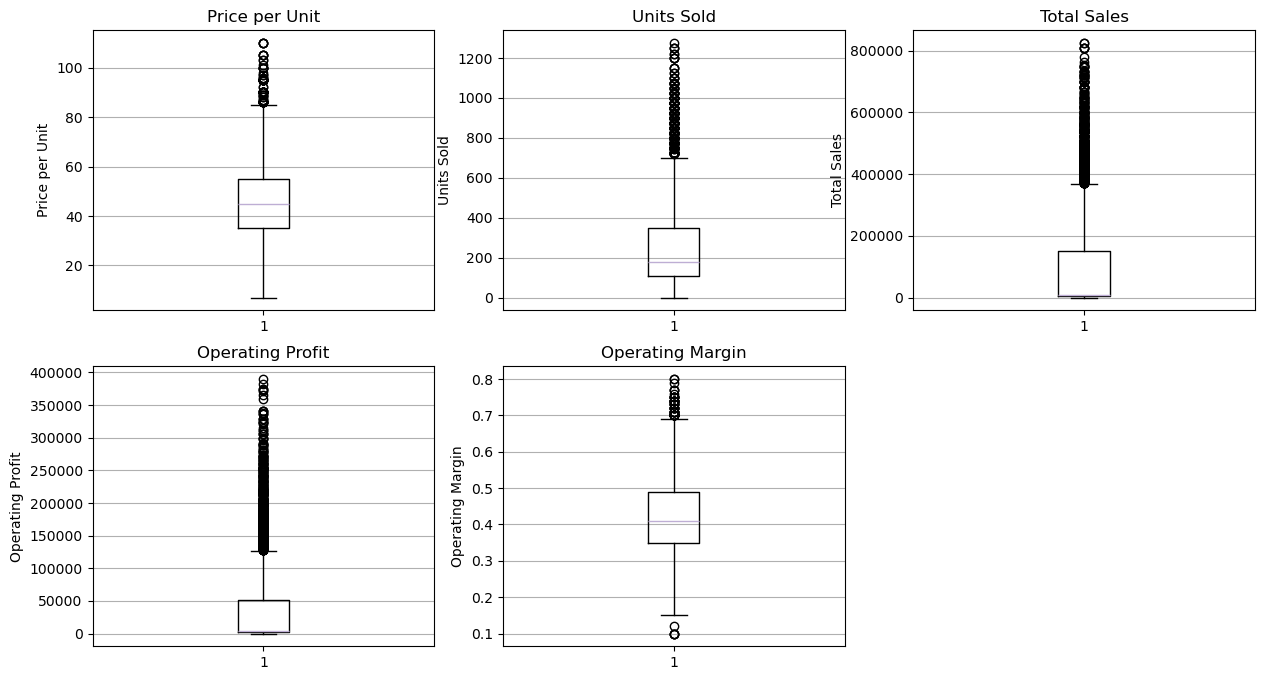

In [15]:
plt.figure(figsize=(15, 8))
for i, coluna in enumerate(colunas_numericas):
    plt.subplot(2, 3, i + 1)  # Ajustar o layout para 2 linhas e 3 colunas
    plt.boxplot(df_adidas[coluna])
    plt.title(coluna)
    plt.ylabel(coluna)
    plt.grid(axis='y')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\boxplot_inicial.png", dpi=200, bbox_inches='tight')

plt.show()

In [16]:
# Aplicar transformação logarítmica
df_adidas['Log_Total_Sales'] = np.log1p(df_adidas['Total Sales'])
df_adidas['Log_Units_Sold'] = np.log1p(df_adidas['Units Sold'])
df_adidas['Log_Operating_Profit'] = np.log1p(df_adidas['Operating Profit'])
df_adidas['Log_Operating_Margin'] = np.log1p(df_adidas['Operating Margin'])
df_adidas['Log_Price_per_Unit'] = np.log1p(df_adidas['Price per Unit'])

In [17]:
colunas_numericas_log = ["Log_Total_Sales", "Log_Units_Sold", "Log_Operating_Profit", "Log_Operating_Margin", "Log_Price_per_Unit"]

### **Impacto da Transformação Logarítmica**  

Após a aplicação da transformação **log1p**, foi possível suavizar a escala dos valores e reduzir a influência dos outliers.  

#### Comparação Antes e Depois da Transformação (`Total Sales`)  

| Métrica                 | **Total Sales** (Original) | **Log_Total_Sales** (Transformado) |
|-------------------------|--------------------------|--------------------------------|
| **Média (mean)**        | 93.273,40                | 9,90                           |
| **Desvio Padrão (std)** | 141.916,00               | 1,94                           |
| **Mínimo (min)**        | 0,00                      | 0,00                           |
| **25% (Q1)**           | 4.254,50                 | 8,36                           |
| **Mediana (Q2)**        | 9.576,00                 | 9,17                           |
| **75% (Q3)**           | 150.000,00               | 11,92                          |
| **Máximo (max)**        | 825.000,00               | 13,62                          |

#### Principais Observações  
1. **Redução da Assimetria** – Antes da transformação, os valores estavam altamente dispersos, com um **desvio padrão muito alto** (141.916). Após a transformação, o desvio padrão caiu para **1,94**, indicando maior concentração dos valores próximos à média.  
2. **Diminuição do Impacto dos Outliers** – O valor máximo original (**825.000**) foi reduzido para **13,62**, tornando os dados mais adequados para análise estatística e modelagem.  
3. **Normalização das Variáveis Numéricas** – O mesmo efeito foi observado para **Units Sold, Operating Profit, Operating Margin e Price per Unit**, reduzindo variações extremas e melhorando a distribuição.  

#### Visualização da Transformação  
Para verificar a distribuição dos dados antes e depois da transformação, foram gerados histogramas:

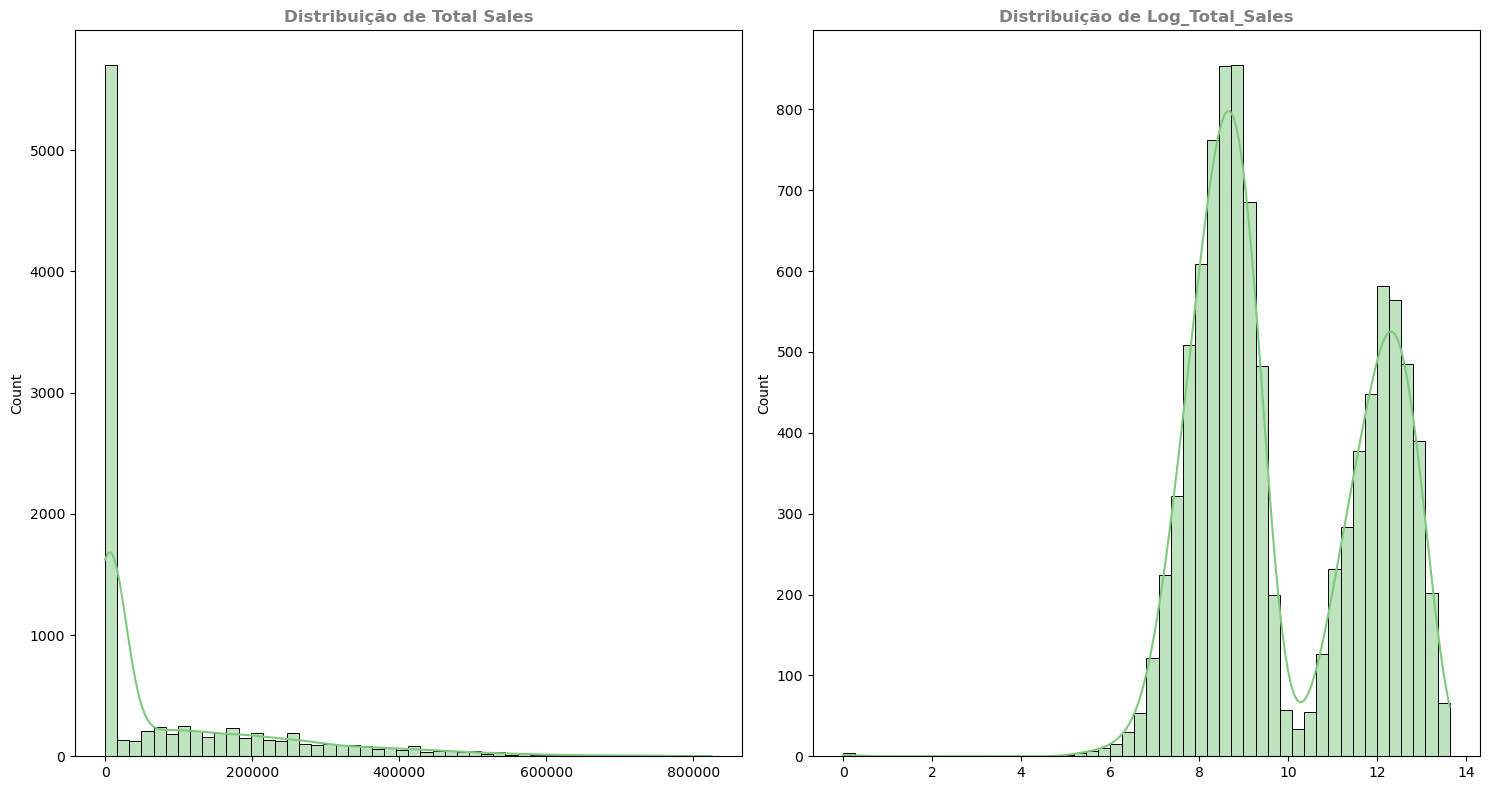

In [18]:
plt.figure(figsize=(15, 8))

# Comparação entre colunas originais e transformadas
for i, coluna in enumerate(["Total Sales", "Log_Total_Sales"]):
    plt.subplot(1, 2, i + 1)
    sns.histplot(df_adidas[coluna], bins=50, kde=True)
    plt.title(f'Distribuição de {coluna}', fontsize=12, weight='bold', color='gray')
    plt.xlabel("")

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\tratamento_histograma_total_sales_log.png", dpi=200, bbox_inches='tight')

plt.tight_layout()
plt.show()

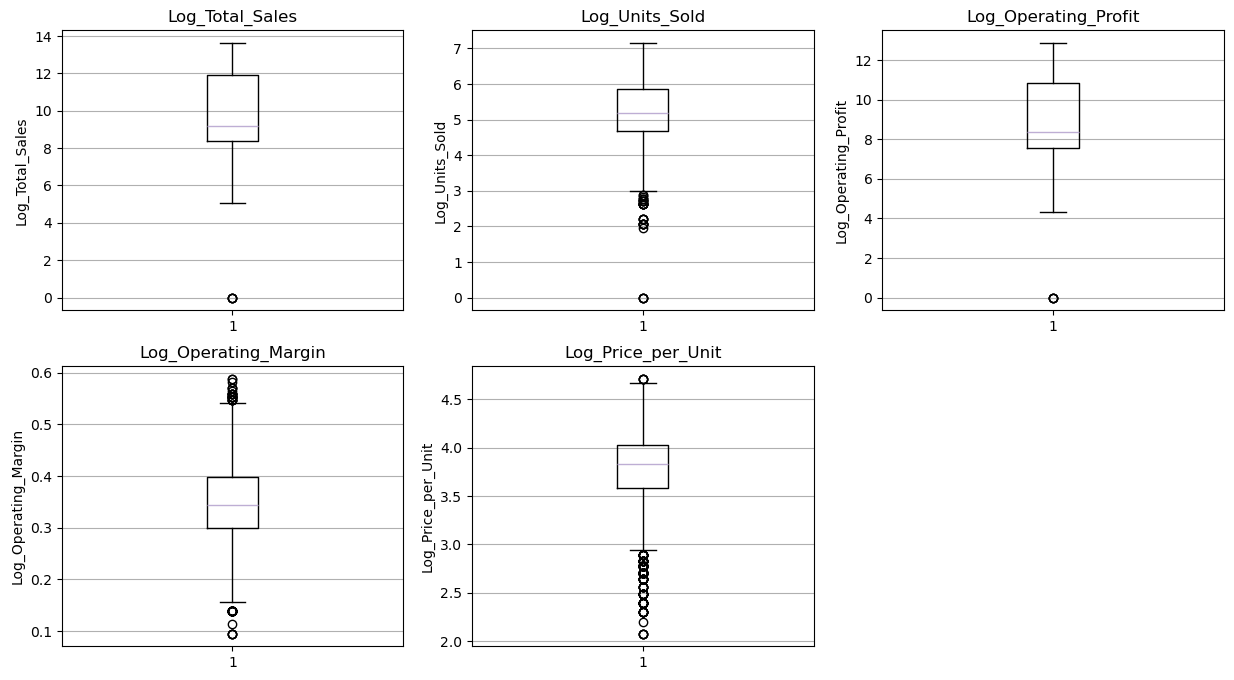

In [19]:
plt.figure(figsize=(15, 8))
for i, coluna in enumerate(colunas_numericas_log):
    plt.subplot(2, 3, i + 1)  # Ajustar o layout para 2 linhas e 3 colunas
    plt.boxplot(df_adidas[coluna])
    plt.title(coluna)
    plt.ylabel(coluna)
    plt.grid(axis='y')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\boxplot_tratamento_parcial_log.png", dpi=200, bbox_inches='tight')

plt.show()

### **Tratamento de Outliers (sem remoção)**  

Após a aplicação da transformação logarítmica, foi necessário realizar o tratamento dos **outliers** para evitar impactos negativos na análise. Em vez de remover os valores extremos, optei por **suavizá-los** usando técnicas estatísticas.

#### Técnicas Utilizadas  

1️⃣ **Winsorization** – Substitui os valores mais extremos pelos percentis **5% e 95%**, mantendo a integridade dos dados.  
2️⃣ **Padronização (Z-Score)** – Normaliza as variáveis numéricas para que tenham **média 0 e desvio padrão 1**, tornando a distribuição mais equilibrada.  

#### Aplicação do Tratamento  

O código abaixo aplica **Winsorization** para limitar os valores extremos e, em seguida, usa o **Z-Score** para padronizar os dados:  

In [20]:
# Aplicar Winsorization para limitar os valores extremos
for coluna in colunas_numericas_log:
    df_adidas[coluna] = winsorize(df_adidas[coluna], limits=[0.05, 0.05])  # 5% inferior e superior

# Aplicar Padronização (Z-Score)
scaler = StandardScaler()
df_adidas[colunas_numericas_log] = scaler.fit_transform(df_adidas[colunas_numericas_log])

# Exibir resumo estatístico após tratamento
df_adidas[colunas_numericas_log].describe()

3,Log_Total_Sales,Log_Units_Sold,Log_Operating_Profit,Log_Operating_Margin,Log_Price_per_Unit
count,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03,9.648000e+03
mean,-4.006377e-16,-2.356692e-16,-1.414015e-16,-5.862272e-16,-1.154779e-15
std,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00,1.000052e+00
min,-1.352629e+00,-1.769420e+00,-1.388812e+00,-1.993255e+00,-2.122669e+00
25%,-8.293957e-01,-7.327280e-01,-8.257237e-01,-7.837209e-01,-6.557479e-01
50%,-3.971792e-01,-8.181676e-02,-3.610215e-01,-1.003005e-01,1.468311e-01
75%,1.068819e+00,8.035778e-01,1.039684e+00,7.670198e-01,7.908992e-01
max,1.599706e+00,1.743453e+00,1.633285e+00,1.886445e+00,1.567958e+00


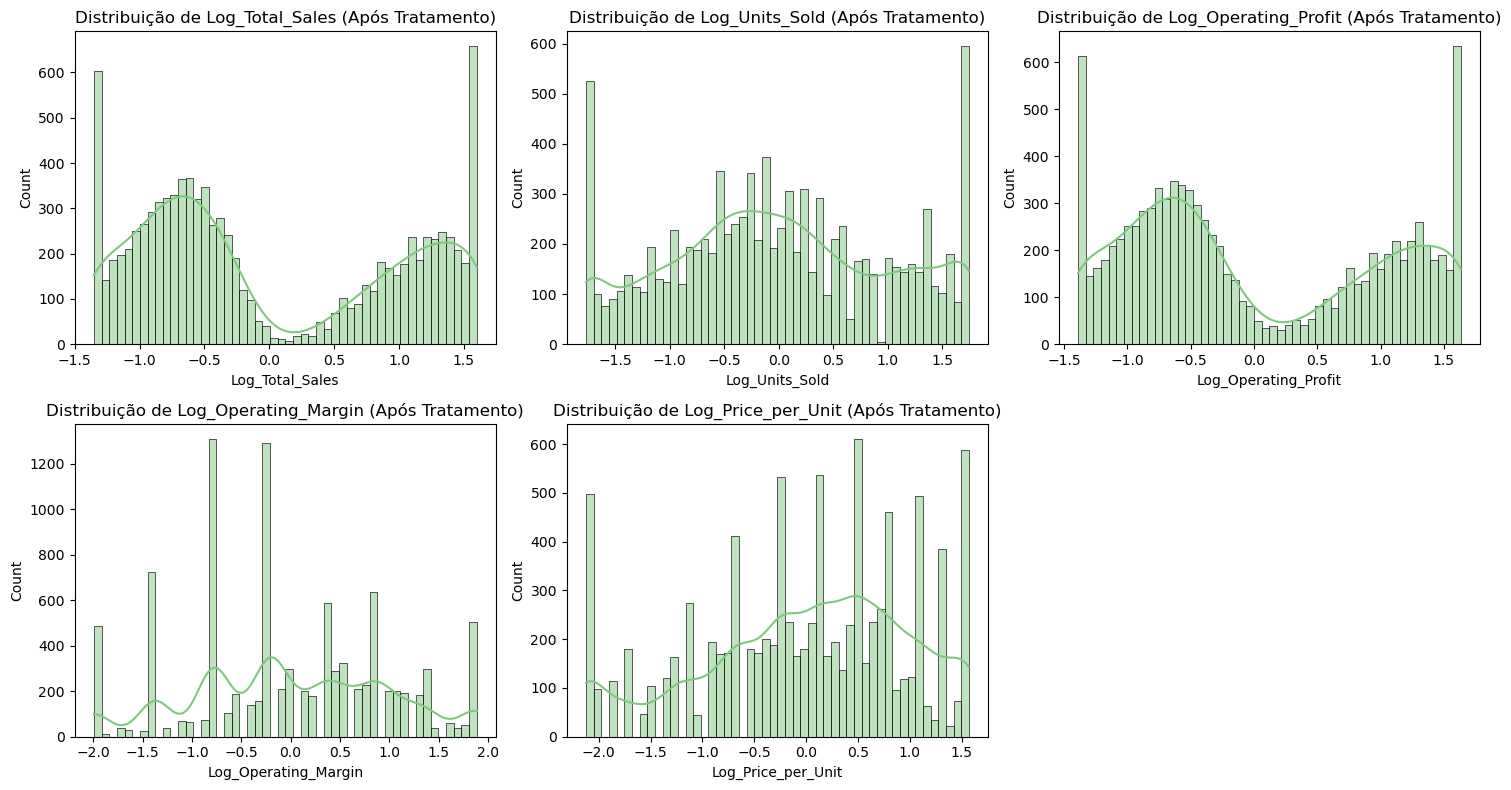

In [21]:
plt.figure(figsize=(15, 8))

# Comparação das distribuições antes e depois do tratamento
for i, coluna in enumerate(colunas_numericas_log):
    plt.subplot(2, 3, i + 1)
    sns.histplot(df_adidas[coluna], bins=50, kde=True)
    plt.title(f'Distribuição de {coluna} (Após Tratamento)')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\tratamento_histograma_log.png", dpi=200, bbox_inches='tight')

plt.tight_layout()
plt.show()

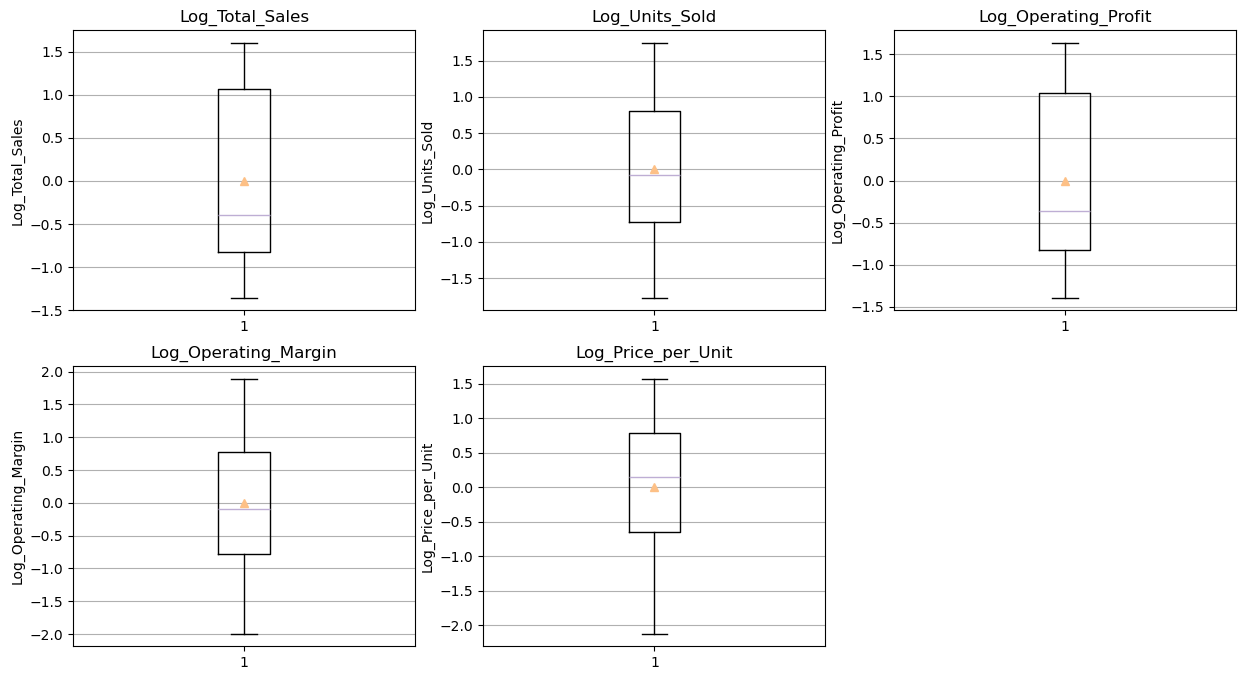

In [22]:
plt.figure(figsize=(15, 8))
for i, coluna in enumerate(colunas_numericas_log):
    plt.subplot(2, 3, i + 1)  # Ajustar o layout para 2 linhas e 3 colunas
    plt.boxplot(df_adidas[coluna], showmeans=True)
    plt.title(coluna)
    plt.ylabel(coluna)
    plt.grid(axis='y')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\boxplot_final_log.png", dpi=200, bbox_inches='tight')

plt.show()

### Análise de Regressão das Unidades Vendidas com Margem e Média de Preço

#### Relação entre Margem Operacional e Vendas  
- Existe uma **relação inversa** entre **Log_Operating_Margin** (Margem Operacional em log) e **Log_Units_Sold** (Unidades Vendidas em log).  
- O coeficiente angular (**slope = -0.3372**) indica que **quando a margem operacional aumenta, as vendas tendem a diminuir**.  
- A correlação é **fraca (`r = -0.3372`)**, sugerindo que **a margem operacional não é o único fator determinante das vendas**.

#### Significância Estatística e Impacto no Modelo  
- O resultado é **estatisticamente significativo** (`p < 0.05`), ou seja, **a relação entre margem operacional e quantidade vendida não é aleatória**.  
- No entanto, o coeficiente de determinação **R² = 11.37%** mostra que **a margem operacional explica apenas uma pequena parte da variação das vendas**.  
- Isso indica que outros fatores, como **preço, promoções e categoria do produto**, provavelmente têm um impacto maior sobre as vendas.


In [23]:
resultado_regressao1 = linregress(df_adidas["Log_Price_per_Unit"], df_adidas["Log_Units_Sold"])

resultado_regressao1

LinregressResult(slope=np.float64(0.24824974030326838), intercept=np.float64(5.100441373509505e-17), rvalue=np.float64(0.24824974030326805), pvalue=np.float64(1.9017434684007206e-135), stderr=np.float64(0.009863110683622472), intercept_stderr=np.float64(0.009863110683622466))

In [24]:
coeficiente_determinacao1 = resultado_regressao1.rvalue**2

coeficiente_determinacao1

np.float64(0.06162793356064003)

In [25]:
resultado_regressao2 = linregress(df_adidas["Log_Operating_Margin"], df_adidas["Log_Units_Sold"])

resultado_regressao2

LinregressResult(slope=np.float64(-0.3371634809427263), intercept=np.float64(-4.3332364107856223e-16), rvalue=np.float64(-0.3371634809427255), pvalue=np.float64(4.098681139530409e-255), stderr=np.float64(0.009585655984597378), intercept_stderr=np.float64(0.009585655984597362))

In [26]:
coeficiente_determinacao2 = resultado_regressao2.rvalue**2

coeficiente_determinacao2

np.float64(0.11367921288141564)

### Matriz de Covariância das Variáveis (log)

- O **volume de vendas é o principal impulsionador do faturamento e do lucro operacional**, mais do que o preço por unidade.
- A **margem operacional tende a cair à medida que as vendas aumentam**, possivelmente indicando **redução de preços para aumentar o volume ou aumento nos custos operacionais**.
- Estratégias que equilibram **preço, volume de vendas e controle de custos** são essenciais para **maximizar a rentabilidade sem comprometer a margem operacional**.

In [27]:
df_adidas_numericas = df_adidas[colunas_numericas_log]

df_adidas_numericas.cov()

3,Log_Total_Sales,Log_Units_Sold,Log_Operating_Profit,Log_Operating_Margin,Log_Price_per_Unit
3,,,,,
Log_Total_Sales,1.000104,0.893853,0.993794,-0.475063,0.387278
Log_Units_Sold,0.893853,1.000104,0.898636,-0.337198,0.248275
Log_Operating_Profit,0.993794,0.898636,1.000104,-0.380258,0.389411
Log_Operating_Margin,-0.475063,-0.337198,-0.380258,1.000104,-0.130357
Log_Price_per_Unit,0.387278,0.248275,0.389411,-0.130357,1.000104


### Matriz de Correlação das Variáveis (Log)

A matriz de correlação mostra a relação entre as variáveis transformadas por logaritmo, ajudando a reduzir o impacto de valores extremos e facilitar a interpretação.

- O **faturamento e o lucro operacional estão fortemente relacionados**, o que valida a estratégia de crescimento baseada no volume de vendas.
- **A margem operacional tende a cair à medida que as vendas aumentam**, indicando a necessidade de um equilíbrio entre volume e rentabilidade.
- **O preço unitário tem pouca influência sobre o volume de vendas**, sugerindo que fatores externos, como promoção e marketing, podem desempenhar um papel maior na decisão de compra.

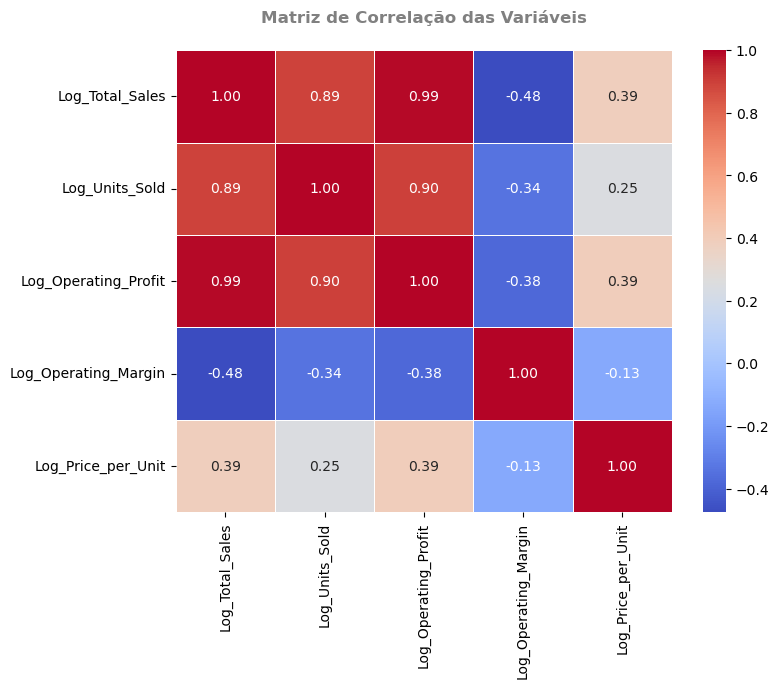

In [28]:
# Calcular matriz de correlação
correlation_matrix = df_adidas[colunas_numericas_log].corr()

# Plotar a heatmap de correlação
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.ylabel("")
plt.xlabel("")
plt.title("Matriz de Correlação das Variáveis", fontsize=12, weight='bold', pad=20, color='gray')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\matriz_correlacao_log.png", dpi=200, bbox_inches='tight')

plt.show()

### Refinamento do Tratamento de Outliers  

Após realizar a transformação logarítmica para suavizar a dispersão dos dados, tive a necessidade de tratar os dados novamente para manter sua integridade, garantindo que cada valor refletisse melhor a granularidade real das informações.

Dessa forma, decidi adotar um **tratamento mais específico**, sem aplicar transformação logarítmica, para manter os dados o mais próximo possível da realidade. Isso permitiria análises mais fiéis, sem distorções causadas pela escala logarítmica.  

### Detecção Inicial de Outliers  

Antes de qualquer tratamento, realizei a detecção de outliers utilizando o método **IQR (Intervalo Interquartílico)**. O objetivo era identificar quantos valores estavam além dos limites convencionais:  

- **Limite Inferior** = \( Q1 - 1.5 \times IQR \)  
- **Limite Superior** = \( Q3 + 1.5 \times IQR \)  

Os resultados mostraram um número significativo de outliers em várias colunas, reforçando a necessidade de um ajuste mais refinado.  

In [29]:
for col in colunas_numericas:
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Critério padrão para outliers
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
    
    print(f"{col}: {outliers} outliers detectados.")

Price per Unit: 81 outliers detectados.
Units Sold: 508 outliers detectados.
Total Sales: 653 outliers detectados.
Operating Profit: 706 outliers detectados.
Operating Margin: 63 outliers detectados.


### Winsorization Adaptativa 

Para suavizar os valores extremos sem removê-los, implementei uma **Winsorization adaptativa**. Em vez de aplicar um corte fixo, utilizei um ajuste dinâmico baseado na quantidade de outliers restantes:  

1. **Iniciei com percentis conservadores** (5% a 95%).  
2. **Ajustei dinamicamente os percentis** até eliminar os valores extremos sem distorcer os dados.  
3. **Verifiquei a redução de outliers** a cada iteração.  

Esse método permitiu preservar a maior parte da distribuição original, ao mesmo tempo em que eliminava valores extremamente discrepantes.  

In [30]:
def ajustar_winsorization_adaptativa(df, colunas_numericas):
    percentis_finais = {}

    for col in colunas_numericas:
        lower, upper = 0.05, 0.95  # Começamos com Winsorization moderada

        while lower > 0.0:
            lower_bound = df[col].quantile(lower)
            upper_bound = df[col].quantile(upper)

            # Criar uma cópia temporária da coluna
            temp_col = df[col].copy()
            temp_col = temp_col.clip(lower=lower_bound, upper=upper_bound)

            # Calcular IQR para verificar outliers restantes
            Q1 = temp_col.quantile(0.25)
            Q3 = temp_col.quantile(0.75)
            IQR = Q3 - Q1
            lower_bound_iqr = Q1 - 1.5 * IQR
            upper_bound_iqr = Q3 + 1.5 * IQR

            outliers_restantes = ((temp_col < lower_bound_iqr) | (temp_col > upper_bound_iqr)).sum()

            print(f"🔍 {col}: {outliers_restantes} outliers restantes | Percentis: {lower:.2f} a {upper:.2f}")

            if outliers_restantes == 0:
                percentis_finais[col] = (lower, upper)
                print(f"✅ Percentis finais para {col}: ({lower:.2f}, {upper:.2f}) - Sem mais outliers\n")
                break

            lower = max(lower - 0.01, 0.0)
            upper = min(upper + 0.01, 1.0)

    return percentis_finais

# 🚀 Aplicar a Winsorization Adaptativa
percentis_finais = ajustar_winsorization_adaptativa(df_adidas, colunas_numericas)

# 🚀 Aplicar os novos limites ao df_adidas
for col, (lower, upper) in percentis_finais.items():
    lower_bound = df_adidas[col].quantile(lower)
    upper_bound = df_adidas[col].quantile(upper)

    print(f"\n🔧 Aplicando Winsorization final em {col} | Limites: {lower_bound:.2f} a {upper_bound:.2f}")

    df_adidas[col] = df_adidas[col].clip(lower_bound, upper_bound)

# ✅ **Alteração AQUI:** Garantir que os valores no DataFrame sejam atualizados!
df_adidas.update(df_adidas)

print("\n✅ Winsorization Adaptativa aplicada com sucesso!")

🔍 Price per Unit: 0 outliers restantes | Percentis: 0.05 a 0.95
✅ Percentis finais para Price per Unit: (0.05, 0.95) - Sem mais outliers

🔍 Units Sold: 508 outliers restantes | Percentis: 0.05 a 0.95
🔍 Units Sold: 508 outliers restantes | Percentis: 0.04 a 0.96
🔍 Units Sold: 508 outliers restantes | Percentis: 0.03 a 0.97
🔍 Units Sold: 508 outliers restantes | Percentis: 0.02 a 0.98
🔍 Units Sold: 508 outliers restantes | Percentis: 0.01 a 0.99
🔍 Total Sales: 653 outliers restantes | Percentis: 0.05 a 0.95
🔍 Total Sales: 653 outliers restantes | Percentis: 0.04 a 0.96
🔍 Total Sales: 653 outliers restantes | Percentis: 0.03 a 0.97
🔍 Total Sales: 653 outliers restantes | Percentis: 0.02 a 0.98
🔍 Total Sales: 653 outliers restantes | Percentis: 0.01 a 0.99
🔍 Operating Profit: 706 outliers restantes | Percentis: 0.05 a 0.95
🔍 Operating Profit: 706 outliers restantes | Percentis: 0.04 a 0.96
🔍 Operating Profit: 706 outliers restantes | Percentis: 0.03 a 0.97
🔍 Operating Profit: 706 outliers 

C:\Users\Camilo_Bica\AppData\Local\Temp\ipykernel_22288\1907471207.py:13: FutureWarning: Downcasting behavior in Series and DataFrame methods 'where', 'mask', and 'clip' is deprecated. In a future version this will not infer object dtypes or cast all-round floats to integers. Instead call result.infer_objects(copy=False) for object inference, or cast round floats explicitly. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  temp_col = temp_col.clip(lower=lower_bound, upper=upper_bound)


In [31]:
for col in colunas_numericas:
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  # Critério padrão para outliers
    upper_bound = Q3 + 1.5 * IQR

    outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
    
    print(f"{col}: {outliers} outliers detectados.")

Price per Unit: 0 outliers detectados.
Units Sold: 508 outliers detectados.
Total Sales: 653 outliers detectados.
Operating Profit: 706 outliers detectados.
Operating Margin: 0 outliers detectados.


### Aplicação do IQR Dinâmico

Mesmo após a Winsorization, percebi que alguns produtos ainda apresentavam valores extremos. Para lidar com isso, implementei um **ajuste dinâmico do IQR**, aumentando progressivamente o multiplicador do IQR até que o número de outliers estivesse dentro de um limite aceitável (menos de 5% dos dados).  

1. **Comecei com o critério tradicional** (1.5x IQR).  
2. **Ajustei progressivamente até 3x IQR**, garantindo que as distribuições ficassem balanceadas.  
3. **Apliquei os novos limites ao DataFrame**, garantindo que os valores fossem ajustados corretamente.  

In [32]:
iqr_multipliers = {}

for col in ["Units Sold", "Total Sales", "Operating Profit"]:
    multiplier = 2.0  # Começamos com o IQR 2.0x
    while True:
        Q1 = df_adidas[col].quantile(0.25)
        Q3 = df_adidas[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - multiplier * IQR
        upper_bound = Q3 + multiplier * IQR

        outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
        
        print(f"🔍 {col}: {outliers} outliers restantes | IQR {multiplier:.1f}x")

        if outliers < 0.05 * len(df_adidas):  
            print(f"✅ Novo critério final para {col}: IQR {multiplier:.1f}x - Outliers agora sob controle!\n")
            iqr_multipliers[col] = multiplier
            break

        multiplier += 0.5

# ✅ **Alteração AQUI:** Aplicar os limites ajustados ao DataFrame
for col, multiplier in iqr_multipliers.items():
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    print(f"\n🔧 Aplicando Winsorization FINAL em {col} | Limites: {lower_bound:.2f} a {upper_bound:.2f}")

    df_adidas[col] = df_adidas[col].clip(lower_bound, upper_bound)

# ✅ **Alteração AQUI:** Atualizar o DataFrame para salvar as mudanças
df_adidas.update(df_adidas)

print("\n✅ Winsorization com IQR ajustado aplicada corretamente!")

🔍 Units Sold: 215 outliers restantes | IQR 2.0x
✅ Novo critério final para Units Sold: IQR 2.0x - Outliers agora sob controle!

🔍 Total Sales: 357 outliers restantes | IQR 2.0x
✅ Novo critério final para Total Sales: IQR 2.0x - Outliers agora sob controle!

🔍 Operating Profit: 453 outliers restantes | IQR 2.0x
✅ Novo critério final para Operating Profit: IQR 2.0x - Outliers agora sob controle!


🔧 Aplicando Winsorization FINAL em Units Sold | Limites: -382.00 a 838.00

🔧 Aplicando Winsorization FINAL em Total Sales | Limites: -287236.50 a 441491.00

🔧 Aplicando Winsorization FINAL em Operating Profit | Limites: -98361.00 a 152344.00

✅ Winsorization com IQR ajustado aplicada corretamente!


In [33]:
# Verificar outliers novamente
for col in colunas_numericas:
    Q1 = df_adidas[col].quantile(0.25)
    Q3 = df_adidas[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 2.0 * IQR  # Mantendo o critério ajustado
    upper_bound = Q3 + 2.0 * IQR

    outliers = ((df_adidas[col] < lower_bound) | (df_adidas[col] > upper_bound)).sum()
    
    print(f"{col}: {outliers} outliers detectados após ajuste final.")

Price per Unit: 0 outliers detectados após ajuste final.
Units Sold: 0 outliers detectados após ajuste final.
Total Sales: 0 outliers detectados após ajuste final.
Operating Profit: 0 outliers detectados após ajuste final.
Operating Margin: 0 outliers detectados após ajuste final.


### Resultados Após o Tratamento

Após a aplicação da Winsorization e do ajuste do IQR, os outliers foram drasticamente reduzidos:  

- **Antes do tratamento:**  
  - **Units Sold:** 508 outliers  
  - **Total Sales:** 653 outliers  
  - **Operating Profit:** 706 outliers  

- **Depois do tratamento:**  
  - **Units Sold:** 0 outliers  
  - **Total Sales:** 0 outliers  
  - **Operating Profit:** 0 outliers  

Com esse refinamento, garanti que os dados permanecessem próximos da realidade, sem remoção agressiva de informações, o que permite análises estatísticas e preditivas mais robustas.  

In [34]:
with pd.option_context("float_format", "{:.2f}".format):
    display(df_adidas.describe())

3,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Log_Total_Sales,Log_Units_Sold,Log_Operating_Profit,Log_Operating_Margin,Log_Price_per_Unit
count,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00,9648.00
mean,44.98,254.48,89366.98,31837.95,0.42,-0.00,-0.00,-0.00,-0.00,-0.00
std,13.18,206.37,129231.77,45380.82,0.09,1.00,1.00,1.00,1.00,1.00
min,22.00,0.00,0.00,0.00,0.25,-1.35,-1.77,-1.39,-1.99,-2.12
25%,35.00,106.00,4254.50,1921.00,0.35,-0.83,-0.73,-0.83,-0.78,-0.66
50%,45.00,176.00,9576.00,4371.00,0.41,-0.40,-0.08,-0.36,-0.10,0.15
75%,55.00,350.00,150000.00,52062.00,0.49,1.07,0.80,1.04,0.77,0.79
max,70.00,838.00,441491.00,152344.00,0.60,1.60,1.74,1.63,1.89,1.57


### Ajuste Fino de Outliers por Produto  

Ao analisar os outliers de forma geral, percebi que algumas variáveis ainda apresentavam valores extremos quando segmentadas por produto. Isso indicou que a distribuição dos dados variava significativamente entre as diferentes categorias.  

Para corrigir essa inconsistência, decidi aplicar um **tratamento individualizado para cada produto**, garantindo um ajuste mais preciso dos outliers.  



### Identificação de Outliers por Produto  

Inicialmente, calculei o número de outliers em cada variável separadamente para cada categoria de produto. Utilizei o método **IQR (Intervalo Interquartílico) ajustado**, com um fator de **2.0x** para uma análise mais detalhada.  

Os resultados mostraram que algumas categorias, como **Men’s Athletic Footwear** e **Men’s Apparel**, ainda continham uma quantidade significativa de valores extremos.  

#### Resultados da Identificação de Outliers por Produto  

| Produto                     | Price per Unit | Units Sold | Total Sales | Operating Profit | Operating Margin |
|-----------------------------|---------------|------------|-------------|------------------|------------------|
| Men's Street Footwear       | 0             | 0          | 0           | 0                | 0                |
| Men's Athletic Footwear     | 0             | 39         | 62          | 53               | 0                |
| Women's Street Footwear     | 0             | 45         | 96          | 96               | 0                |
| Women's Athletic Footwear   | 0             | 65         | 91          | 118              | 0                |
| Men's Apparel               | 0             | 89         | 91          | 125              | 0                |
| Women's Apparel             | 0             | 45         | 0           | 0                | 0                |

Com base nesses dados, ficou claro que **Units Sold, Total Sales e Operating Profit ainda possuíam outliers relevantes**, necessitando de um ajuste mais refinado.  

In [35]:
# Criar um dicionário para armazenar os resultados
outliers_por_produto = {}

# Verificar outliers em cada produto separadamente
for col in colunas_numericas:
    outliers_por_produto[col] = {}
    
    for produto in df_adidas["Product"].unique():
        # Filtrar os dados para o produto específico
        df_produto = df_adidas[df_adidas["Product"] == produto]
        
        # Calcular IQR ajustado
        Q1 = df_produto[col].quantile(0.25)
        Q3 = df_produto[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.0 * IQR
        upper_bound = Q3 + 2.0 * IQR

        # Contar outliers para esse produto e coluna
        outliers = ((df_produto[col] < lower_bound) | (df_produto[col] > upper_bound)).sum()
        
        # Armazenar no dicionário
        outliers_por_produto[col][produto] = outliers

# Converter para DataFrame para visualização
df_outliers = pd.DataFrame(outliers_por_produto)

# Exibir os resultados
print("\n📊 Outliers por Produto:")
print(df_outliers)


📊 Outliers por Produto:
                           Price per Unit  Units Sold  Total Sales  \
Men's Street Footwear                   0           0            0   
Men's Athletic Footwear                 0          39           62   
Women's Street Footwear                 0          45           96   
Women's Athletic Footwear               0          65           91   
Men's Apparel                           0          89           91   
Women's Apparel                         0          45            0   

                           Operating Profit  Operating Margin  
Men's Street Footwear                     0                 0  
Men's Athletic Footwear                  53                 0  
Women's Street Footwear                  96                 0  
Women's Athletic Footwear               118                 0  
Men's Apparel                           125                 0  
Women's Apparel                           0                 0  


### Winsorization Ajustada com IQR 2.5x

Para eliminar os valores extremos sem perder a integridade dos dados, aumentei o critério do **IQR de 2.0x para 2.5x**, mas apenas para as colunas que ainda continham outliers:  

- **Units Sold**  
- **Total Sales**  
- **Operating Profit**  

O novo critério foi aplicado individualmente para cada produto, garantindo um ajuste personalizado para cada categoria.  

Após essa etapa, os outliers foram completamente eliminados dessas colunas, resultando em uma distribuição mais equilibrada para todas as categorias de produtos.  

✅ **Winsorization com IQR 2.5x aplicada para `Units Sold`, `Total Sales` e `Operating Profit`!**  

In [36]:
# Ajustar IQR dinamicamente apenas para as variáveis que ainda têm outliers
for col in ["Units Sold", "Total Sales", "Operating Profit"]:
    for produto in df_adidas["Product"].unique():
        df_produto = df_adidas[df_adidas["Product"] == produto]
        
        Q1 = df_produto[col].quantile(0.25)
        Q3 = df_produto[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR  # Aumentamos para 2.5x apenas para essas variáveis
        upper_bound = Q3 + 2.5 * IQR

        # Aplicar Winsorization para essas colunas específicas
        df_adidas.loc[df_adidas["Product"] == produto, col] = df_adidas.loc[df_adidas["Product"] == produto, col].clip(lower_bound, upper_bound)

print("\n✅ Winsorization com IQR 2.5x aplicada para `Units Sold`, `Total Sales` e `Operating Profit`!")


✅ Winsorization com IQR 2.5x aplicada para `Units Sold`, `Total Sales` e `Operating Profit`!


C:\Users\Camilo_Bica\AppData\Local\Temp\ipykernel_22288\2476768270.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[687.5 687.5 687.5 ... 114.  116.   51. ]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_adidas.loc[df_adidas["Product"] == produto, col] = df_adidas.loc[df_adidas["Product"] == produto, col].clip(lower_bound, upper_bound)
C:\Users\Camilo_Bica\AppData\Local\Temp\ipykernel_22288\2476768270.py:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[400000. 380000. 380000. ...   6016.   3465.   2407.]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_adidas.loc[df_adidas["Product"] == produto, col] = df_adidas.loc[df_adidas["Product"] == produto, col].clip(lower_bound, upper_bound)
C:\Users\Camilo_Bica\AppData\Local\Temp\ipyk

### Verificação Final de Outliers por Produto  

Após aplicar os novos ajustes, refiz a contagem de outliers para garantir que todos os valores extremos fossem adequadamente tratados.  

#### Resultados Após Ajuste

| Produto                     | Price per Unit | Units Sold | Total Sales | Operating Profit | Operating Margin |
|-----------------------------|---------------|------------|-------------|------------------|------------------|
| Men's Street Footwear       | 0             | 0          | 0           | 0                | 0                |
| Men's Athletic Footwear     | 0             | 0          | 0           | 0                | 0                |
| Women's Street Footwear     | 0             | 0          | 0           | 0                | 0                |
| Women's Athletic Footwear   | 0             | 0          | 0           | 0                | 0                |
| Men's Apparel               | 0             | 0          | 0           | 0                | 0                |
| Women's Apparel             | 0             | 0          | 0           | 0                | 0                |

Como esperado, **não restaram mais outliers em nenhuma variável**, garantindo que os dados estejam completamente ajustados sem distorções significativas.  

In [37]:
# Verificar outliers em cada produto separadamente após o ajuste
for col in ["Units Sold", "Total Sales", "Operating Profit"]:  # Apenas colunas ajustadas
    outliers_por_produto[col] = {}
    
    for produto in df_adidas["Product"].unique():
        # Filtrar os dados para o produto específico
        df_produto = df_adidas[df_adidas["Product"] == produto]
        
        # Calcular IQR ajustado (agora com 2.5x)
        Q1 = df_produto[col].quantile(0.25)
        Q3 = df_produto[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 2.5 * IQR  # Novo critério com IQR 2.5x
        upper_bound = Q3 + 2.5 * IQR

        # Contar outliers para esse produto e coluna
        outliers = ((df_produto[col] < lower_bound) | (df_produto[col] > upper_bound)).sum()
        
        # Armazenar no dicionário
        outliers_por_produto[col][produto] = outliers

# Converter para DataFrame para visualização
df_outliers_final = pd.DataFrame(outliers_por_produto)

# Exibir os resultados
print("\n📊 Outliers por Produto Após Ajuste:")
print(df_outliers_final)


📊 Outliers por Produto Após Ajuste:
                           Price per Unit  Units Sold  Total Sales  \
Men's Street Footwear                   0           0            0   
Men's Athletic Footwear                 0           0            0   
Women's Street Footwear                 0           0            0   
Women's Athletic Footwear               0           0            0   
Men's Apparel                           0           0            0   
Women's Apparel                         0           0            0   

                           Operating Profit  Operating Margin  
Men's Street Footwear                     0                 0  
Men's Athletic Footwear                   0                 0  
Women's Street Footwear                   0                 0  
Women's Athletic Footwear                 0                 0  
Men's Apparel                             0                 0  
Women's Apparel                           0                 0  


### Visualização Final com Boxplots por Produto 

Para validar a eficácia do tratamento, gerei **boxplots das variáveis numéricas segmentadas por produto**. A nova distribuição mostrou que os dados estão **mais homogêneos, sem valores extremos que poderiam impactar a análise.**  

Com esse ajuste refinado, agora os dados estão prontos para serem utilizados em análises estatísticas e modelagens preditivas com maior confiabilidade.  

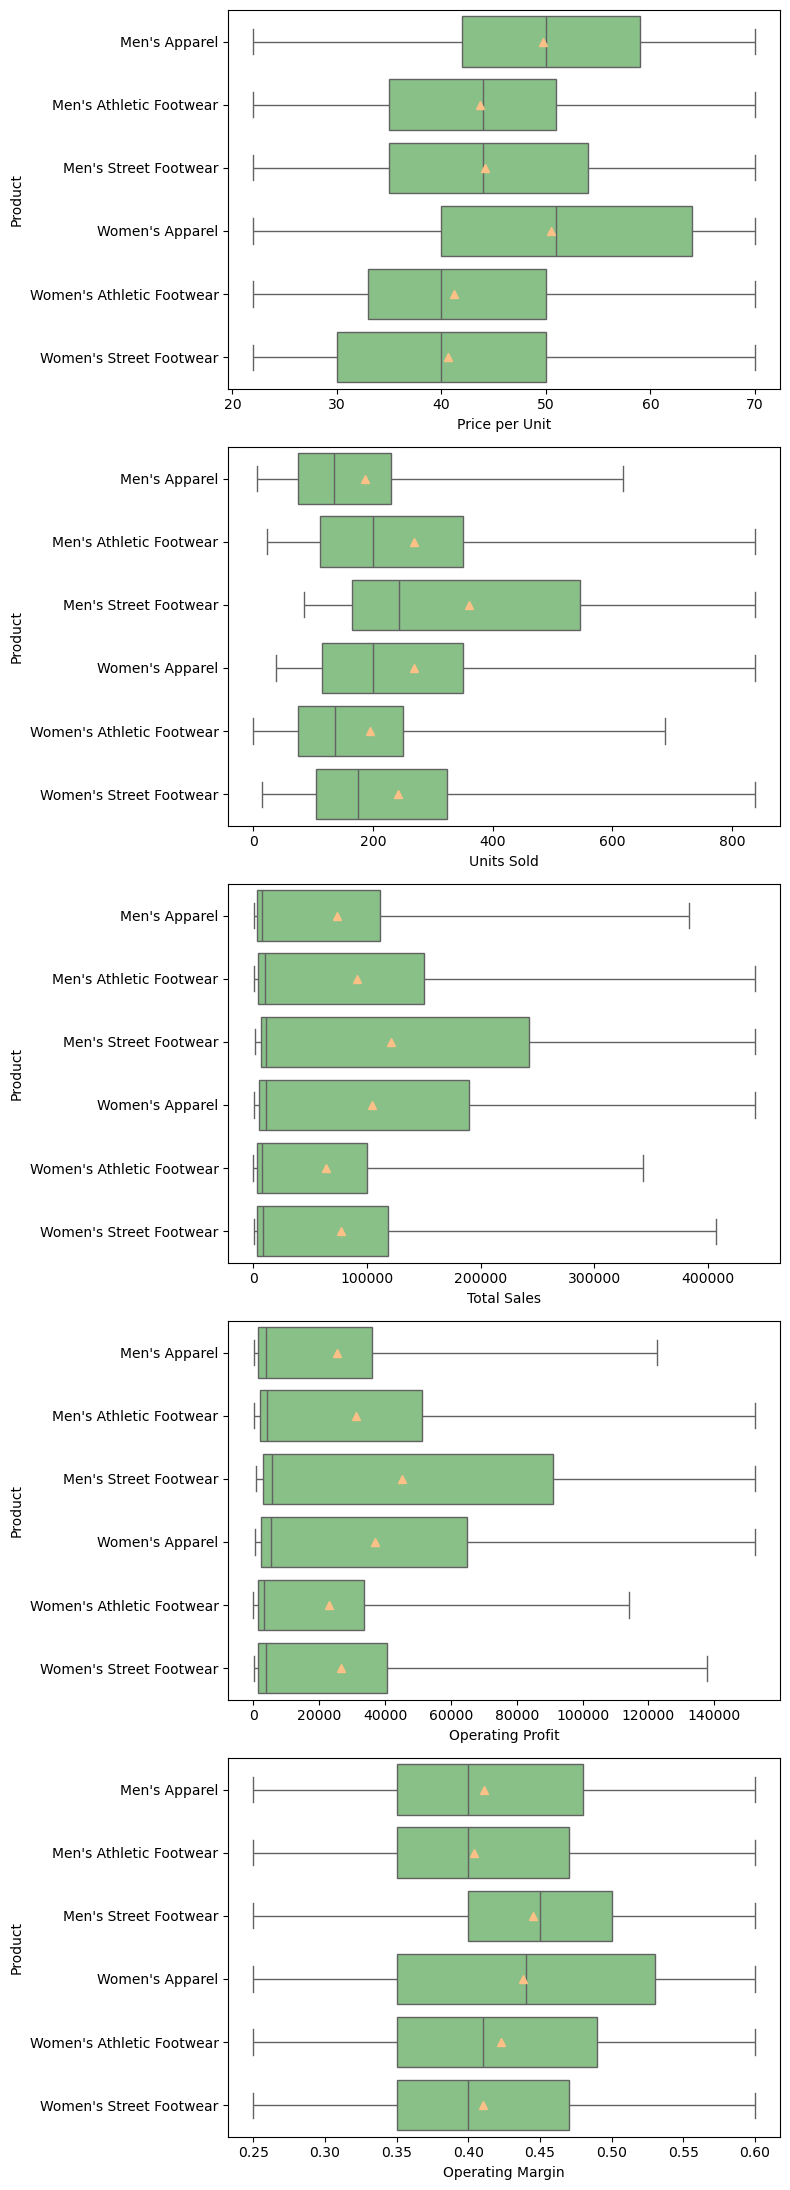

In [38]:
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 22), tight_layout=True, sharey=True)

for i, coluna in enumerate(colunas_numericas):
    sns.boxplot(x=coluna, y='Product', data=df_adidas, ax=axes[i], whis=2.5, showmeans=True)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\bloxplot_tratado_produtos.png", dpi=300, bbox_inches='tight')

plt.show() 

In [39]:
df_adidas.to_csv(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\dados\df_adidas_tratado.csv", index=False)

## **Análise Exploratória de Dados (EDA)**

#### **Segmentação Temporal e Análise Comparativa de Vendas**

Após o tratamento dos outliers, segmentei os dados por **ano** para compreender a evolução das vendas ao longo do tempo e identificar padrões de comportamento. Para isso, segui os seguintes passos:



#### Preparação dos Dados Temporais
Antes de iniciar a análise comparativa, foi necessário **garantir que a coluna de datas estivesse corretamente formatada** e ordenada.  

- Converto a coluna `Invoice Date` para o formato **datetime**.  
- Ordeno os dados cronologicamente.  
- Defino `Invoice Date` como **índice** do DataFrame para permitir agregações temporais com `resample()`.  
- Extraio **ano** e **mês** da data da fatura e crio colunas auxiliares para facilitar a análise.  

**Objetivo**: Criar uma estrutura que permita a segmentação por período e facilite comparações entre anos.

In [40]:
# Garantir que 'Invoice Date' seja datetime e ordenar
df_adidas['Invoice Date'] = pd.to_datetime(df_adidas['Invoice Date'])
df_adidas = df_adidas.sort_values(by='Invoice Date')

# Definir 'Invoice Date' como índice para resample()
df_adidas.set_index('Invoice Date', inplace=True)

# Extrair o ano e o mês e adicionar como uma coluna no dataframe
df_adidas['Ano'] = df_adidas.index.year
df_adidas['Mês'] = df_adidas.index.month

In [41]:
df_adidas.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9648 entries, 2020-01-01 to 2021-12-31
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Retailer              9648 non-null   category
 1   Region                9648 non-null   category
 2   State                 9648 non-null   category
 3   City                  9648 non-null   category
 4   Product               9648 non-null   category
 5   Price per Unit        9648 non-null   int64   
 6   Units Sold            9648 non-null   float64 
 7   Total Sales           9648 non-null   float64 
 8   Operating Profit      9648 non-null   float64 
 9   Operating Margin      9648 non-null   float64 
 10  Sales Method          9648 non-null   category
 11  Log_Total_Sales       9648 non-null   float64 
 12  Log_Units_Sold        9648 non-null   float64 
 13  Log_Operating_Profit  9648 non-null   float64 
 14  Log_Operating_Margin  9648 non-null   

### **Análise Comparativa por Ano**  

A partir da estrutura temporal, **separei os dados em dois subconjuntos**:  

- `df_2020` → Contém apenas as vendas de 2020.  
- `df_2021` → Contém apenas as vendas de 2021.  

Em seguida, realizei uma **análise comparativa** das seguintes métricas para cada ano:
- **Total de Unidades Vendidas (`Units Sold`)**  
- **Preço Médio por Unidade (`Price per Unit`)**  
- **Total de Faturamento (`Total Sales`)**  

Para cada **categoria categórica não ordenada**, agreguei essas métricas para os anos **2020** e **2021**, permitindo visualizar tendências e variações.  

**Objetivo**: Compreender **quais regiões, estados, cidades, varejistas, métodos de vendas e produtos** tiveram **maior crescimento ou queda** entre os anos analisados.  

### **Construção da Tabela de Comparação**  

Para facilitar a leitura dos resultados, organizei os dados em uma tabela com os seguintes campos:  

| Categoria | Total Units Sold 2020 | Average Price per Unit 2020 | Total Sales 2020 | Total Units Sold 2021 | Average Price per Unit 2021 | Total Sales 2021 |  
|-----------|----------------------|----------------------------|------------------|----------------------|----------------------------|------------------|  

Além disso:  
- Ordenei os dados **do maior para o menor faturamento de 2021**, destacando os principais segmentos.  
- Formatei os números para facilitar a interpretação, aplicando **separadores de milhar**.  

**Objetivo**: Criar uma tabela clara e organizada para comparar o desempenho dos diferentes segmentos entre 2020 e 2021.  

In [42]:
# Criar um dataframe para cada ano
df_2020 = df_adidas[df_adidas['Ano'] == 2020]
df_2021 = df_adidas[df_adidas['Ano'] == 2021]

# Criar uma lista para armazenar os resultados do groupby
resultados_groupby = []

# Loop para realizar o groupby e calcular a soma e a média das unidades vendidas para 2020 e 2021
for coluna in colunas_categoricas_nao_ordenadas:
    # Calcular para 2020
    total_vendas_2020 = df_2020.groupby(coluna, observed=False)["Units Sold"].sum()
    media_preco_medio_2020 = df_2020.groupby(coluna, observed=False)["Price per Unit"].mean().round(2)
    total_faturamento_2020 = df_2020.groupby(coluna, observed=False)["Total Sales"].sum()
    
    # Calcular para 2021
    total_vendas_2021 = df_2021.groupby(coluna, observed=False)["Units Sold"].sum()
    media_preco_medio_2021 = df_2021.groupby(coluna, observed=False)["Price per Unit"].mean().round(2)
    total_faturamento_2021 = df_2021.groupby(coluna, observed=False)["Total Sales"].sum()
    
    # Criar um DataFrame para armazenar as informações de total e média, por ano
    df_vendas = pd.DataFrame({
        "Total Units Sold 2020": total_vendas_2020,
        "Average Price per Unit 2020": media_preco_medio_2020,
        "Total Sales 2020": total_faturamento_2020,
        "Total Units Sold 2021": total_vendas_2021,
        "Average Price per Unit 2021": media_preco_medio_2021,
        "Total Sales 2021": total_faturamento_2021
    })
    
    df_vendas = df_vendas.sort_values(by="Total Sales 2021", ascending=False)
    resultados_groupby.append(df_vendas.head(10))

df_vendas_final = pd.concat(resultados_groupby, keys=colunas_categoricas_nao_ordenadas)

# Formatar as colunas de 'Total Units Sold' e 'Total Sales' com separação de milhar
df_vendas_final["Total Units Sold 2020"] = df_vendas_final["Total Units Sold 2020"].apply(lambda x: "{:,.0f}".format(x))
df_vendas_final["Total Sales 2020"] = df_vendas_final["Total Sales 2020"].apply(lambda x: "{:,.0f}".format(x))
df_vendas_final["Total Units Sold 2021"] = df_vendas_final["Total Units Sold 2021"].apply(lambda x: "{:,.0f}".format(x))
df_vendas_final["Total Sales 2021"] = df_vendas_final["Total Sales 2021"].apply(lambda x: "{:,.0f}".format(x))

df_vendas_final

Total Units Sold 2020  \
Region       West                                    162,684   
             Northeast                               100,856   
             Midwest                                  20,838   
             Southeast                                68,150   
             South                                    87,460   
State        California                               23,112   
             South Carolina                                0   
             New York                                 97,799   
             Florida                                  68,150   
             North Carolina                                0   
             Hawaii                                        0   
             Texas                                    87,460   
             New Mexico                                    0   
             Louisiana                                     0   
             Virginia                                      0   
City         Charleston                                    0   
             Portland                                      0   
             Los Angeles                                   0   
             Albany                                        0   
             Orlando                                       0   
             Charlotte                                     0   
             San Francisco                            23,112   
             Honolulu                                      0   
             Dallas                                        0   
             Albuquerque                                   0   
Retailer     Foot Locker                             108,922   
             Sports Direct                            44,777   
             West Gear                               191,550   
             Kohl's                                    2,214   
             Amazon                                        0   
             Walmart                                  92,523   
Sales Method In-store                                149,637   
             Online                                   87,085   
             Outlet                                  203,265   
Product      Men's Street Footwear                    91,412   
             Women's Apparel                          77,221   
             Men's Athletic Footwear                  79,361   
             Women's Street Footwear                  74,079   
             Men's Apparel                            56,374   
             Women's Athletic Footwear                61,540   

                                        Average Price per Unit 2020  \
Region       West                                             57.16   
             Northeast                                        47.66   
             Midwest                                          41.29   
             Southeast                                        50.81   
             South                                            38.28   
State        California                                       51.22   
             South Carolina                                     NaN   
             New York                                         47.94   
             Florida                                          50.81   
             North Carolina                                     NaN   
             Hawaii                                             NaN   
             Texas                                            38.28   
             New Mexico                                         NaN   
             Louisiana                                          NaN   
             Virginia                                           NaN   
City         Charleston                                         NaN   
             Portland                                           NaN   
             Los Angeles                                        NaN   
             Albany                                             N

### **Resultados e Insights Principais**  

A análise dos dados revelou algumas **transformações notáveis** no mercado da Adidas entre 2020 e 2021, destacando uma **expansão geográfica, mudanças no comportamento do consumidor e novas tendências de consumo**.

**Crescimento Exponencial em Algumas Regiões**  
- A **Região Oeste** teve um aumento expressivo nas vendas, saltando de **73 milhões** para **184 milhões** em faturamento.  
- A **Região Nordeste** também apresentou crescimento relevante.

**Expansão Geográfica Significativa**  
- Em **2020**, as vendas estavam concentradas em **apenas 9 estados e 9 cidades**.  
- Em **2021**, houve uma **expansão massiva** para **46 estados e 45 cidades**, indicando uma estratégia de alcance nacional mais agressiva e um aumento na distribuição.

**Mudança no Método de Compra**  
- O **Sales Method "Online"** já era o mais utilizado, mas em 2021 houve um **crescimento expressivo**, consolidando-se como o principal canal de vendas.  
- Isso reforça a tendência do e-commerce e a adaptação dos consumidores a compras digitais.

**Varejistas com Maior Crescimento**  
- **Foot Locker** e **Sports Direct** mais que **quadruplicaram suas vendas** entre 2020 e 2021.  
- **Amazon** passou de **zero vendas em 2020** para **76 milhões em 2021**, indicando uma forte transição para o e-commerce.  

**Mudança na Preferência por Tipo de Produto**  
- Em **2020**, o produto mais vendido era **Men's Street Footwear**, um calçado mais casual.  
- Em **2021**, o destaque passou para **Men's Athletic Footwear**, indicando que os consumidores estão mais focados em **bem-estar e atividade física**.  

**Conclusão**: A Adidas não apenas **expandiu sua presença geográfica**, mas também **se adaptou às novas preferências dos consumidores**, com um foco maior em **vendas online** e um aumento na demanda por **calçados esportivos**, possivelmente refletindo uma maior preocupação com a saúde e o bem-estar.

In [43]:
df_2020.describe(exclude="number")

3,Retailer,Region,State,City,Product,Sales Method
count,1302,1302,1302,1302,1302,1302
unique,5,5,9,9,6,3
top,West Gear,West,Nevada,Las Vegas,Women's Apparel,Online
freq,635,567,216,216,219,530


In [44]:
df_2021.describe(exclude="number")

3,Retailer,Region,State,City,Product,Sales Method
count,8346,8346,8346,8346,8346,8346
unique,6,5,46,45,6,3
top,Foot Locker,Northeast,California,Portland,Men's Athletic Footwear,Online
freq,2300,2145,369,360,1394,4359


### Análise de Produtos por Categorias Qualitativas

Foram criadas tabelas dinâmicas para analisar as vendas de cada produto considerando três variáveis: **região, método de venda e varejista**. 

- **Produtos por Região**: Identificação das regiões com maior volume de vendas e variação de preço médio.  
- **Produtos por Método de Venda**: Comparação do desempenho dos produtos entre vendas online, em lojas físicas e outlets.  
- **Produtos por Varejista**: Análise dos produtos mais vendidos por cada varejista e diferenças nos preços médios.

O objetivo foi entender como as vendas variam conforme o canal e o local de distribuição, ajudando na identificação de padrões e oportunidades estratégicas.

In [45]:
# Criar a tabela dinâmica com as funções de agregação
df_product_region = df_adidas.pivot_table(
    index="Product",
    columns="Region",
    values=["Units Sold", "Total Sales", "Price per Unit"],
    aggfunc={"Units Sold": "sum", "Total Sales": "sum", "Price per Unit": "mean"},
    observed=False
)

# Acessar e arredondar o preço por unidade para cada região
for region in df_product_region.columns.levels[1]:  # Iterar sobre as regiões
    df_product_region[('Price per Unit', region)] = df_product_region[('Price per Unit', region)].round(2)
    df_product_region[('Units Sold', region)] = df_product_region[('Units Sold', region)].map("{:,.0f}".format)
    df_product_region[('Total Sales', region)] = df_product_region[('Total Sales', region)].map("{:,.0f}".format)

# Ordenar pela coluna 'Total Sales' da primeira região como exemplo
df_product_region = df_product_region.sort_values(by=('Total Sales', df_product_region.columns.levels[1][0]), ascending=False)

df_product_region

3                         Price per Unit                                    \
Region                           Midwest Northeast  South Southeast   West   
Product                                                                      
Men's Street Footwear              41.87     48.60  35.84     47.87  45.54   
Women's Apparel                    47.37     52.14  42.85     54.86  54.42   
Men's Athletic Footwear            38.28     44.94  37.02     48.03  49.06   
Men's Apparel                      46.92     52.31  42.34     54.10  52.52   
Women's Street Footwear            34.02     40.20  36.10     44.50  47.35   
Women's Athletic Footwear          34.93     41.49  37.21     45.35  46.48   

3                         Total Sales                                      \
Region                        Midwest   Northeast       South   Southeast   
Product                                                                     
Men's Street Footwear      37,611,981  47,489,545  27,180,956  30,455,455   
Women's Apparel            28,002,547  35,200,661  28,058,253  27,308,913   
Men's Athletic Footwear    21,305,539  28,045,638  24,855,740  25,841,116   
Men's Apparel              18,115,628  23,835,749  19,363,090  22,414,228   
Women's Street Footwear    16,244,898  22,835,492  21,551,884  21,756,420   
Women's Athletic Footwear  13,595,154  18,853,194  17,903,278  18,810,668   

3                                     Units Sold                               \
Region                           West    Midwest Northeast    South Southeast   
Product                                                                         
Men's Street Footwear      51,996,593    109,651   129,632  105,764    85,579   
Women's Apparel            49,072,499     69,435    88,004   88,058    68,070   
Men's Athletic Footwear    47,433,082     65,120    79,955   89,384    70,795   
Men's Apparel              34,695,378     45,304    58,825   60,394    51,601   
Women's Street Footwear    41,027,979     56,809    72,908   80,912    65,488   
Women's Athletic Footwear  33,162,624     44,808    57,439   63,898    54,392   

3                                   
Region                        West  
Product                             
Men's Street Footwear      149,330  
Women's Apparel            116,728  
Men's Athletic Footwear    127,204  
Men's Apparel               83,604  
Women's Street Footwear    113,519  
Women's Athletic Footwear   93,399

In [46]:
df_product_sales_method = df_adidas.pivot_table(
    index="Product",
    columns="Sales Method",
    values=["Units Sold", "Total Sales", "Price per Unit"],
    aggfunc={"Units Sold": "sum", "Total Sales": "sum", "Price per Unit": "mean"},
    observed=False
)

for sales_method in df_product_sales_method.columns.levels[1]:  
    df_product_sales_method[('Price per Unit', sales_method)] = df_product_sales_method[('Price per Unit', sales_method)].round(2)
    df_product_sales_method[('Units Sold', sales_method)] = df_product_sales_method[('Units Sold', sales_method)].map("{:,.0f}".format)
    df_product_sales_method[('Total Sales', sales_method)] = df_product_sales_method[('Total Sales', sales_method)].map("{:,.0f}".format)

df_product_sales_method = df_product_sales_method.sort_values(by=('Total Sales', df_product_sales_method.columns.levels[1][0]), ascending=False)

df_product_sales_method

3                         Price per Unit               Total Sales  \
Sales Method                    In-store Online Outlet    In-store   
Product                                                              
Men's Street Footwear              48.54  44.93  40.34  82,801,558   
Women's Apparel                    53.51  51.48  47.08  66,207,169   
Men's Athletic Footwear            46.48  44.18  41.24  56,566,790   
Men's Apparel                      53.64  50.89  45.67  47,598,904   
Women's Street Footwear            42.38  40.83  39.30  46,544,127   
Women's Athletic Footwear          43.05  41.66  39.39  38,868,046   

3                                                 Units Sold                    
Sales Method                   Online      Outlet   In-store   Online   Outlet  
Product                                                                         
Men's Street Footwear      52,994,068  58,938,904    171,842  221,305  186,809  
Women's Apparel            46,955,177  54,480,527    119,954  163,552  146,789  
Men's Athletic Footwear    40,543,259  50,371,066    116,803  163,694  151,961  
Men's Apparel              34,342,861  36,482,308     83,630  116,413   99,685  
Women's Street Footwear    33,298,158  43,574,386    105,311  147,485  136,840  
Women's Athletic Footwear  28,676,951  34,779,921     84,775  120,355  108,806

In [47]:
df_product_retailer = df_adidas.pivot_table(
    index="Product",
    columns="Retailer",
    values=["Units Sold", "Total Sales", "Price per Unit"],
    aggfunc={"Units Sold": "sum", "Total Sales": "sum", "Price per Unit": "mean"},
    observed=False
)

df_product_retailer = df_product_retailer.sort_values(by=('Total Sales', df_product_retailer.columns.levels[1][0]), ascending=False)

for retailer in df_product_retailer.columns.levels[1]: 
    df_product_retailer[('Price per Unit', retailer)] = df_product_retailer[('Price per Unit', retailer)].round(2)
    df_product_retailer[('Units Sold', retailer)] = df_product_retailer[('Units Sold', retailer)].map("{:,.0f}".format)
    df_product_retailer[('Total Sales', retailer)] = df_product_retailer[('Total Sales', retailer)].map("{:,.0f}".format)

df_product_retailer

3                         Price per Unit                                   \
Retailer                          Amazon Foot Locker Kohl's Sports Direct   
Product                                                                     
Men's Street Footwear              50.85       44.92  42.34         39.88   
Women's Apparel                    53.84       50.26  51.69         47.48   
Men's Athletic Footwear            47.16       42.93  43.74         40.18   
Men's Apparel                      54.64       50.10  49.33         46.72   
Women's Street Footwear            41.61       39.05  40.78         38.73   
Women's Athletic Footwear          43.67       40.06  40.63         39.89   

3                                           Total Sales              \
Retailer                  Walmart West Gear      Amazon Foot Locker   
Product                                                               
Men's Street Footwear       46.29     44.41  21,691,600  52,731,288   
Women's Apparel             51.58     51.10  15,455,351  40,276,382   
Men's Athletic Footwear     46.47     45.31  12,011,959  34,973,259   
Men's Apparel               48.06     50.72  10,386,020  27,587,895   
Women's Street Footwear     43.31     42.87   9,376,468  28,161,132   
Women's Athletic Footwear   41.89     42.68   7,872,934  23,105,678   

3                                                                            \
Retailer                       Kohl's Sports Direct     Walmart   West Gear   
Product                                                                       
Men's Street Footwear      22,404,046    36,864,615  12,867,914  48,175,067   
Women's Apparel            20,126,920    35,515,801  13,109,712  43,158,707   
Men's Athletic Footwear    17,754,021    30,672,429  12,317,332  39,752,115   
Men's Apparel              14,137,473    24,316,582  10,309,506  31,686,598   
Women's Street Footwear    14,834,291    27,205,879   9,460,824  34,378,078   
Women's Athletic Footwear  12,486,554    22,665,905   7,962,852  28,230,994   

3                         Units Sold                                    \
Retailer                      Amazon Foot Locker  Kohl's Sports Direct   
Product                                                                  
Men's Street Footwear         54,784     152,382  66,461       122,837   
Women's Apparel               35,885     102,846  49,012        99,181   
Men's Athletic Footwear       31,987     102,586  50,926        99,993   
Men's Apparel                 24,005      68,138  35,903        66,524   
Women's Street Footwear       28,629      91,465  45,910        91,564   
Women's Athletic Footwear     22,544      71,316  38,504        73,372   

3                                            
Retailer                  Walmart West Gear  
Product                                      
Men's Street Footwear      40,286   143,206  
Women's Apparel            36,583   106,788  
Men's Athletic Footwear    36,112   110,854  
Men's Apparel              28,900    76,258  
Women's Street Footwear    30,866   101,202  
Women's Athletic Footwear  26,098    82,102

### Distribuição de Produtos por Varejista, Região e Método de Venda

Foi criada uma tabela cruzada para analisar a distribuição percentual das vendas de cada **produto** considerando **varejista, região e método de venda**. 

- **Segmentação detalhada**: Permite visualizar como cada produto é comercializado em diferentes cenários.  
- **Cálculo de proporções**: Os valores foram normalizados para representar a participação relativa de cada método de venda.  

Essa análise ajuda a entender quais combinações de canais e regiões são mais relevantes para cada produto.

In [48]:
df_product_all = pd.crosstab(
    [df_adidas["Product"], df_adidas["Retailer"], df_adidas["Region"]],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_product_all_final = df_product_all.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_product_all_final

### Análise de Associação entre Produtos e Varejistas

Foi realizado um **teste de qui-quadrado** para verificar a relação entre **tipo de produto e varejista**. O objetivo foi entender se a distribuição dos produtos entre os varejistas ocorre de forma aleatória ou se há um padrão significativo.

#### Metodologia
- Criada uma **tabela cruzada** com a contagem real de vendas para cada produto em cada varejista.
- Calculadas as **frequências esperadas** para avaliar desvios em relação à distribuição teórica.
- Aplicado o **teste de qui-quadrado** para verificar a dependência entre as variáveis.

#### Principais Resultados
- **Estatística Qui-Quadrado**: 1.85  
- **Valor-p**: 1.0  
- **Graus de liberdade**: 25  

A hipótese nula do teste de qui-quadrado afirma que **não há relação significativa entre os tipos de produtos e os varejistas**, ou seja, os produtos são distribuídos de maneira independente entre os diferentes varejistas.

### Análise de Associação entre Produtos e Outras Categorias  

Além da análise de varejistas, também foram testadas as associações entre **produto e método de venda** e **produto e região**.  

- **Produto x Método de Venda**: Valor-p ≈ **0.99**  
- **Produto x Região**: Valor-p = **1.0**  

Ambos os testes indicam que **não há relação estatisticamente significativa** entre os tipos de produtos e os métodos de venda ou as regiões. Isso sugere que os produtos são distribuídos de forma relativamente uniforme entre essas categorias, sem padrões específicos de associação.

In [49]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["Product"], df_adidas["Retailer"])

# Realizar o teste de qui-quadrado
product_retailer = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = product_retailer.statistic
p_value = product_retailer.pvalue
degrees_of_freedom = product_retailer[2]  # Índice 2 para graus de liberdade
expected_freq = product_retailer[3]  # Índice 3 para frequências esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequências esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["Product"],
    df_adidas["Retailer"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


,Statistic,p-value,Degrees of Freedom
0,1.853211,1.0,25



 Valores Reais:


Retailer,Amazon,Foot Locker,Kohl's,Sports Direct,Walmart,West Gear
Product,,,,,,
Men's Apparel,157,433,171,339,113,393
Men's Athletic Footwear,159,442,172,337,104,396
Men's Street Footwear,159,449,172,335,101,394
Women's Apparel,159,433,172,341,107,396
Women's Athletic Footwear,158,442,171,338,102,395
Women's Street Footwear,157,438,172,342,99,400



 Valores Experados:


Retailer,Amazon,Foot Locker,Kohl's,Sports Direct,Walmart,West Gear
Product,,,,,,
Men's Apparel,157.97,438.95,171.45,338.25,104.20,395.17
Men's Athletic Footwear,158.36,440.05,171.88,339.09,104.46,396.16
Men's Street Footwear,158.36,440.05,171.88,339.09,104.46,396.16
Women's Apparel,158.17,439.50,171.67,338.67,104.33,395.67
Women's Athletic Footwear,157.97,438.95,171.45,338.25,104.20,395.17
Women's Street Footwear,158.17,439.50,171.67,338.67,104.33,395.67


In [50]:
product_sales_method = chi2_contingency(
    pd.crosstab(df_adidas["Product"], df_adidas["Sales Method"])
)

product_sales_method.pvalue

np.float64(0.9999999999993749)

In [51]:
product_region = chi2_contingency(
    pd.crosstab(df_adidas["Product"], df_adidas["Region"])
)

product_region.pvalue

np.float64(1.0)

### Análise do Método de Vendas por Região e Cidade  

Para entender a distribuição dos métodos de venda nas diferentes **regiões** e **cidades**, foram geradas **tabelas cruzadas** que mostram a participação percentual de cada método de venda (In-store, Online, Outlet) dentro das regiões e cidades.  

#### Distribuição do Método de Vendas por Região 
A primeira análise segmentou as vendas **por região**, permitindo visualizar quais métodos predominam em cada local. 

- **O Sul tem forte presença de Outlets** (50% das vendas), enquanto o **Sudeste e o Meio-Oeste possuem maior participação de vendas Online**.  
- **O Nordeste é a região mais equilibrada**, com vendas distribuídas entre os três métodos de forma mais homogênea.  
- **No geral, o método Online lidera com 50,7% das vendas totais**, seguido pelo modelo Outlet (31,3%) e In-store (18,0%).  

#### Distribuição do Método de Vendas por Estado e Cidade  
Em seguida, foi gerada uma tabela detalhada **por estado e cidade**, permitindo uma análise mais granular da distribuição das vendas.  

- Algumas cidades como **Columbus (Ohio), Sioux Falls (Dakota do Sul) e Charleston (Carolina do Sul)** têm **100% de suas vendas no formato Online**.  
- **Los Angeles e San Francisco têm predominância de Outlets** (66,7% das vendas), sugerindo um comportamento diferente do restante da Costa Oeste.  
- **Detroit, Milwaukee e Indianápolis possuem equilíbrio entre os métodos** com 50% In-store e 50% Online.  

Esse detalhamento é crucial para compreender **variações geográficas nos hábitos de compra**, permitindo estratégias diferenciadas para cada mercado.


In [52]:
df_region_sales_method = pd.crosstab(
    df_adidas["Region"],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_region_sales_method_final = df_region_sales_method.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_region_sales_method_final

Sales Method,In-store,Online,Outlet
Region,,,
Midwest,23.8%,62.2%,14.0%
Northeast,28.7%,39.4%,31.9%
South,1.2%,48.8%,50.0%
Southeast,15.8%,64.7%,19.4%
West,16.3%,47.1%,36.7%
Total,18.0%,50.7%,31.3%


In [53]:
df_region_sales_method = pd.crosstab(
    [df_adidas["Region"], df_adidas["State"], df_adidas["City"]],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_region_sales_method_final = df_region_sales_method.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_region_sales_method_final

### Análise de Associação entre Método de Venda e Região

Para avaliar se o **método de venda** (In-store, Online, Outlet) está associado à **região**, foi realizado um **teste de qui-quadrado**, comparando a distribuição real das vendas com as frequências esperadas sob hipótese de independência.

#### Resultados do Teste
- **Estatística Qui-Quadrado**: 1079.92  
- **Valor-p**: 8.31e-228  
- **Graus de liberdade**: 8  

O **valor-p extremamente baixo** indica que rejeitamos a hipótese nula, ou seja, **há uma relação significativa entre o método de venda e a região**. Isso significa que **a forma como os clientes compram varia de uma região para outra**.

#### Principais Observações
- A região **Sul** tem a menor participação em vendas In-store (apenas 20), enquanto o **Nordeste e o Oeste possuem distribuições mais equilibradas** entre os três métodos.  
- As **frequências esperadas diferem significativamente das reais**, especialmente para **Outlets na região Sul e Online no Nordeste**, reforçando que certos métodos são mais populares em determinadas áreas.  
- O **Meio-Oeste e o Sudeste são as regiões mais inclinadas ao método Online**, enquanto o Oeste tem maior presença de Outlets.  

Essa análise confirma que **estratégias de venda devem ser adaptadas a cada região**, aproveitando o comportamento dos consumidores locais.

In [54]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["Region"], df_adidas["Sales Method"])

# Realizar o teste de qui-quadrado
sales_method_region = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = sales_method_region.statistic
p_value = sales_method_region.pvalue
degrees_of_freedom = sales_method_region[2]  # Índice 2 para graus de liberdade
expected_freq = sales_method_region[3]  # Índice 3 para frequências esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequências esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["Region"],
    df_adidas["Sales Method"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


,Statistic,p-value,Degrees of Freedom
0,1079.920161,8.311235e-228,8



 Valores Reais:


Sales Method,In-store,Online,Outlet
Region,,,
Midwest,445,1165,262
Northeast,683,936,757
South,20,844,864
Southeast,194,792,238
West,398,1152,898



 Valores Experados:


Sales Method,In-store,Online,Outlet
Region,,,
Midwest,337.61,948.61,585.78
Northeast,428.51,1204.01,743.49
South,311.64,875.64,540.72
Southeast,220.75,620.25,383.01
West,441.49,1240.49,766.01


### Distribuição dos Métodos de Venda por Varejista

Foi realizada uma análise da **distribuição dos métodos de venda** entre os varejistas para identificar padrões no comportamento de compra dos consumidores.

#### Principais Resultados
- **Amazon** tem a maior concentração de vendas **online (56.9%)**, confirmando sua dominância no e-commerce.  
- **West Gear** possui a maior participação em **vendas In-store (29.4%)**, sugerindo uma forte presença física.  
- **Walmart** tem a maior parcela de vendas via **Outlet (48.1%)**, o que pode indicar foco em liquidações e estoques excedentes.  
- **Foot Locker e Kohl’s** possuem distribuições bastante similares, com vendas equilibradas entre **lojas físicas e online**.  
- **Sports Direct** se destaca por uma proporção mais elevada de vendas via **Outlets (36.6%)**, sugerindo uma estratégia mais voltada para esse canal.

A análise confirma que **cada varejista possui um perfil distinto de vendas**, refletindo suas estratégias e preferências do público. Essa informação pode ser usada para alinhar melhor o mix de produtos e promoções conforme o canal mais utilizado por cada varejista.


In [55]:
df_retailer_sales_method = pd.crosstab(
    df_adidas["Retailer"],
    df_adidas["Sales Method"],
    margins=True,
    margins_name="Total",
    normalize="index"
)

df_retailer_sales_method_final = df_retailer_sales_method.style.format("{:.1%}").background_gradient(cmap="RdYlGn", axis="columns")

df_retailer_sales_method_final

Sales Method,In-store,Online,Outlet
Retailer,,,
Amazon,12.4%,56.9%,30.7%
Foot Locker,17.0%,52.9%,30.1%
Kohl's,14.0%,55.9%,30.1%
Sports Direct,14.4%,49.0%,36.6%
Walmart,5.9%,46.0%,48.1%
West Gear,29.4%,46.1%,24.4%
Total,18.0%,50.7%,31.3%


### Análise da Associação entre Varejistas e Métodos de Venda

Foi realizado um **teste de qui-quadrado** para avaliar se há uma associação significativa entre os diferentes varejistas e os métodos de venda utilizados.

#### Principais Resultados
- **Estatística Qui-Quadrado**: 405.83  
- **Valor-p**: 5.41e-81  
- **Graus de liberdade**: 10  

O **baixo valor-p (< 0.001)** indica que **há uma associação significativa entre os varejistas e os métodos de venda**. Isso significa que os diferentes varejistas utilizam estratégias de vendas distintas, com preferências específicas por determinados canais de distribuição.  


In [56]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["Retailer"], df_adidas["Sales Method"])

# Realizar o teste de qui-quadrado
sales_method_retailer = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = sales_method_retailer.statistic
p_value = sales_method_retailer.pvalue
degrees_of_freedom = sales_method_retailer[2]  # Índice 2 para graus de liberdade
expected_freq = sales_method_retailer[3]  # Índice 3 para frequências esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequências esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["Retailer"],
    df_adidas["Sales Method"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


,Statistic,p-value,Degrees of Freedom
0,405.828797,5.408039e-81,10



 Valores Reais:


Sales Method,In-store,Online,Outlet
Retailer,,,
Amazon,118,540,291
Foot Locker,449,1395,793
Kohl's,144,576,310
Sports Direct,293,995,744
Walmart,37,288,301
West Gear,699,1095,580



 Valores Experados:


Sales Method,In-store,Online,Outlet
Retailer,,,
Amazon,171.15,480.89,296.96
Foot Locker,475.58,1336.27,825.16
Kohl's,185.76,521.94,322.30
Sports Direct,366.47,1029.69,635.84
Walmart,112.90,317.22,195.88
West Gear,428.15,1202.99,742.86


### Análise da Associação entre Estados e Métodos de Venda

Foi realizado um **teste de qui-quadrado** para avaliar se há uma relação significativa entre os diferentes estados e os métodos de venda utilizados.

#### Principais Resultados
- **Estatística Qui-Quadrado**: 4483.03  
- **Valor-p**: 0.0  
- **Graus de liberdade**: 98  

O **valor-p extremamente baixo (< 0.001)** confirma que **há uma associação significativa entre os estados e os métodos de venda**. Isso indica que as estratégias de vendas não são uniformes em todos os estados, sugerindo que cada mercado pode ter uma abordagem diferente para os canais de distribuição.  


In [57]:
# Calcular a tabela cruzada
crosstab = pd.crosstab(df_adidas["State"], df_adidas["Sales Method"])

# Realizar o teste de qui-quadrado
sales_method_state = chi2_contingency(crosstab)

# Extrair os resultados
chi2_statistic = sales_method_state.statistic
p_value = sales_method_state.pvalue
degrees_of_freedom = sales_method_state[2]  # Índice 2 para graus de liberdade
expected_freq = sales_method_state[3]  # Índice 3 para frequências esperadas

# Criar um DataFrame com os resultados do teste
df_resultados = pd.DataFrame({
    'Statistic': [chi2_statistic],
    'p-value': [p_value],
    'Degrees of Freedom': [degrees_of_freedom]
})

# Criar um DataFrame para as frequências esperadas
df_expectativa_freq = pd.DataFrame(expected_freq, columns=crosstab.columns, index=crosstab.index).round(2)

# Exibir os resultados
print("Resultado Chi-Squared Test:")
display(df_resultados)

print("\n Valores Reais:")
display(pd.crosstab(
    df_adidas["State"],
    df_adidas["Sales Method"]
)
       )

print("\n Valores Experados:")
display(df_expectativa_freq)

Resultado Chi-Squared Test:


,Statistic,p-value,Degrees of Freedom
0,4483.030875,0.0,98



 Valores Reais:


Sales Method,In-store,Online,Outlet
State,,,
Alabama,0,72,144
Alaska,0,72,72
Arizona,0,144,72
Arkansas,0,144,72
California,0,144,288
Colorado,72,72,0
Connecticut,72,72,72
Delaware,72,72,0
Florida,122,144,94



 Valores Experados:


Sales Method,In-store,Online,Outlet
State,,,
Alabama,38.96,109.46,67.59
Alaska,25.97,72.97,45.06
Arizona,38.96,109.46,67.59
Arkansas,38.96,109.46,67.59
California,77.91,218.91,135.18
Colorado,25.97,72.97,45.06
Connecticut,38.96,109.46,67.59
Delaware,25.97,72.97,45.06
Florida,64.93,182.43,112.65


### Análise Temporal das Unidades Vendidas

A evolução das vendas ao longo do tempo foi analisada por meio de um **gráfico de linha**, permitindo visualizar tendências e variações mensais.

#### Principais Observações
- Durante **2020**, as vendas apresentaram oscilações, com quedas significativas em alguns meses.
- No final de **2020**, houve uma forte queda nas vendas, atingindo seu menor ponto no período analisado.
- Em **janeiro de 2021**, há um **salto abrupto** nas unidades vendidas, indicando uma grande recuperação.
- A partir de **2021**, as vendas se estabilizaram em um patamar elevado, com pequenas variações mensais.

#### Possíveis Interpretações
- A queda observada em **2020** pode estar relacionada a **fatores externos**, como restrições econômicas ou mudanças no comportamento do consumidor.
- O crescimento em **2021** sugere uma **expansão de mercado**, possível aumento da demanda ou maior distribuição dos produtos.
- A estabilidade nas vendas ao longo de **2021** pode indicar um **ajuste bem-sucedido na estratégia comercial** da Adidas.

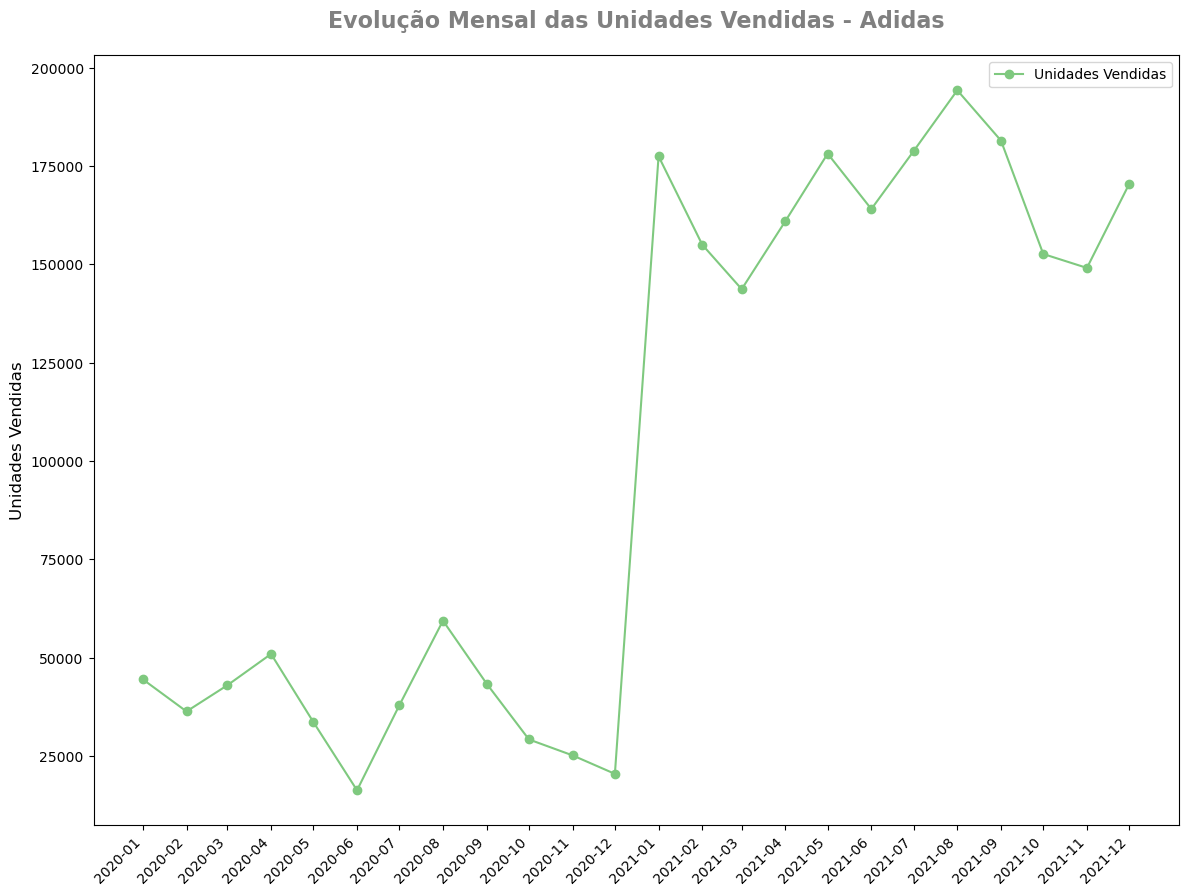

In [58]:
# Agrupar por mês e somar as unidades vendidas
df_mensal = df_adidas['Units Sold'].resample('MS').sum()

# Plotar o gráfico de linha agrupado por mês
plt.figure(figsize=(14, 10))

plt.plot(
    df_mensal.index,   # Eixo X: Datas agrupadas por mês
    df_mensal.values,  # Eixo Y: Unidades Vendidas por mês
    marker='o', 
    linestyle='-',  
    label='Unidades Vendidas'
)

# Definir os rótulos do eixo X para mostrar todos os meses
plt.xticks(
    ticks=df_mensal.index,                     # Datas como ticks
    labels=df_mensal.index.strftime('%Y-%m'),  # Formatar como Ano-Mês
    rotation=45,                               
    ha='right'                                 
)

# Configurações do gráfico
plt.xlabel('')
plt.ylabel('Unidades Vendidas', fontsize=12)
plt.title('Evolução Mensal das Unidades Vendidas - Adidas', fontsize=16, weight='bold', pad=20, color='gray')
plt.xticks(rotation=45)
plt.grid(False) 
plt.legend(loc='upper right')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_temporal_vendas.png", dpi=200, bbox_inches='tight')

plt.show()

### Análise Percentual de Vendas por Produto e Canal

Para compreender melhor as mudanças nas vendas, foi realizada uma análise percentual comparando os anos de **2020 e 2021**. Foram avaliadas as **categorias de produtos mais vendidas** e a **distribuição das vendas por canal**.

#### Principais Observações
**Mudança no perfil dos produtos mais vendidos**:
  - Em **2020**, o produto mais vendido foi **Men's Street Footwear**, representando **20.8%** das vendas.
  - Já em **2021**, **Men’s Street Footwear** aumentou sua participação para **24.4%**, consolidando-se como o principal produto.
  - **Men’s Athletic Footwear** perdeu participação relativa, enquanto as demais categorias permaneceram relativamente estáveis.

**Alteração na distribuição dos canais de venda**:
  - Em **2020**, os canais mais relevantes eram **Outlet (46.2%)** e **In-store (34.0%)**, com **Online** representando apenas **19.8%**.
  - Em **2021**, houve um **crescimento expressivo das vendas online**, que passaram a representar **42.2%** do total, enquanto o canal **Outlet** perdeu espaço.
  - O canal **In-store** também sofreu redução, indicando uma possível mudança de comportamento dos consumidores para compras digitais.

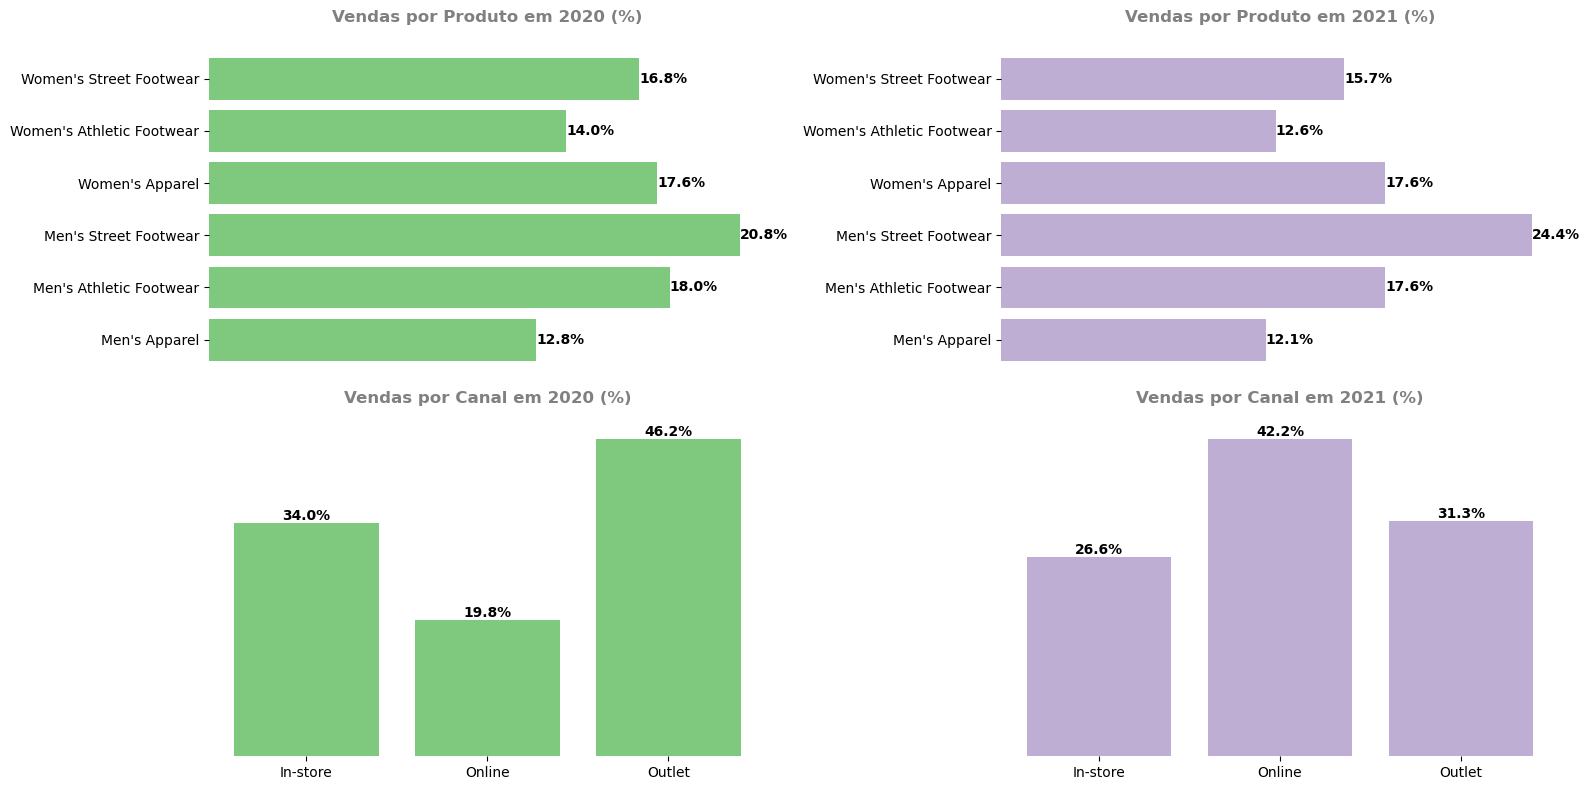

In [59]:
# Agrupar por ano e produto para calcular as vendas
vendas_por_produto = df_adidas.groupby([df_adidas.index.year, 'Product'], observed=False)['Units Sold'].sum().unstack()

# Agrupar por ano e canal de vendas para calcular as vendas
vendas_por_canal = df_adidas.groupby([df_adidas.index.year, 'Sales Method'], observed=False)['Units Sold'].sum().unstack()

# Normalizar os valores para porcentagem (%) dentro de cada ano
vendas_2020_prod_pct = (vendas_por_produto.loc[2020] / vendas_por_produto.loc[2020].sum()) * 100
vendas_2021_prod_pct = (vendas_por_produto.loc[2021] / vendas_por_produto.loc[2021].sum()) * 100
vendas_2020_canal_pct = (vendas_por_canal.loc[2020] / vendas_por_canal.loc[2020].sum()) * 100
vendas_2021_canal_pct = (vendas_por_canal.loc[2021] / vendas_por_canal.loc[2021].sum()) * 100

# Criar a figura e os subgráficos (2x2)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 8), sharey=False)

# Função para adicionar rótulos nas barras
def adicionar_rotulos(ax, horizontal=False):
    for p in ax.patches:
        if horizontal:
            ax.annotate(
                f"{p.get_width():.1f}%",  # Para gráfico horizontal, usamos width
                (p.get_width(), p.get_y() + p.get_height() / 2),
                ha='left', va='center', fontsize=10, fontweight='bold', color='black'
            )
        else:
            ax.annotate(
                f"{p.get_height():.1f}%",  # Para gráfico vertical, usamos height
                (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, fontweight='bold', color='black'
            )

# Gráfico 1: Vendas por Produto em 2020 (Barras Horizontais)
axes[0, 0].barh(vendas_2020_prod_pct.index, vendas_2020_prod_pct.values, color='C0')
axes[0, 0].set_title('Vendas por Produto em 2020 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[0, 0].set_xlabel('')
axes[0, 0].set_ylabel('')
axes[0, 0].set_xticks([])
axes[0, 0].tick_params(bottom=False)
axes[0, 0].grid(False)
adicionar_rotulos(axes[0, 0], horizontal=True)

# Gráfico 2: Vendas por Produto em 2021 (Barras Horizontais)
axes[0, 1].barh(vendas_2021_prod_pct.index, vendas_2021_prod_pct.values, color='C1')
axes[0, 1].set_title('Vendas por Produto em 2021 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[0, 1].set_xlabel('')
axes[0, 1].set_ylabel('')
axes[0, 1].set_xticks([])
axes[0, 1].tick_params(bottom=False)
axes[0, 1].grid(False)
adicionar_rotulos(axes[0, 1], horizontal=True)

# Gráfico 3: Vendas por Canal em 2020 (Barras Verticais)
axes[1, 0].bar(vendas_2020_canal_pct.index, vendas_2020_canal_pct.values, color='C0')
axes[1, 0].set_title('Vendas por Canal em 2020 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[1, 0].set_xlabel('')
axes[1, 0].set_ylabel('')
axes[1, 0].set_yticks([])
axes[1, 0].tick_params(left=False)
axes[1, 0].grid(False)
adicionar_rotulos(axes[1, 0])

# Gráfico 4: Vendas por Canal em 2021 (Barras Verticais)
axes[1, 1].bar(vendas_2021_canal_pct.index, vendas_2021_canal_pct.values, color='C1')
axes[1, 1].set_title('Vendas por Canal em 2021 (%)', fontsize=12, weight='bold', pad=15, color='gray')
axes[1, 1].set_xlabel('')
axes[1, 1].set_ylabel('')
axes[1, 1].set_yticks([])
axes[1, 1].tick_params(left=False)
axes[1, 1].grid(False)
adicionar_rotulos(axes[1, 1])

# Remover o box (spines) de todos os gráficos
for ax in axes.flat:
    for spine in ['top', 'right', 'left', 'bottom']:
        ax.spines[spine].set_visible(False)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_percentual_produto_canal.png", dpi=200, bbox_inches='tight')

# Ajustar layout para não sobrepor os títulos
plt.tight_layout()
plt.show()

### Análise do Faturamento, Preço Médio e Quantidade Vendida

Nesta análise, foram exploradas três dimensões essenciais para entender o desempenho das vendas da Adidas nos anos de **2020 e 2021**: **preço médio dos produtos, quantidade vendida e evolução do faturamento ao longo do tempo**.

#### 1. Comparação Mensal: Preço Médio vs. Quantidade Vendida
- Os gráficos superiores mostram a relação entre **preço médio dos produtos** e **quantidade vendida** em cada mês de **2020 e 2021**.
- **2020** apresentou maior variação nos preços, com picos em **maio e agosto**, enquanto **2021** teve um aumento mais constante ao longo do ano.
- A **quantidade vendida aumentou significativamente em 2021**, indicando maior demanda pelos produtos Adidas.

#### 2. Evolução do Faturamento (Total Sales)
- O gráfico inferior apresenta a evolução mensal do faturamento nos dois anos.
- **2021 teve um crescimento expressivo**, especialmente no segundo semestre, alcançando seu maior pico em **dezembro**.
- Em **2020**, as vendas foram mais voláteis, com quedas acentuadas entre **maio e junho**, possivelmente devido a efeitos da pandemia.

#### Principais Conclusões
- A **elevação na quantidade de vendas em 2021** impulsionou o crescimento do faturamento, apesar de oscilações nos preços médios.
- O **padrão sazonal de vendas foi mais estável em 2021**, sugerindo uma demanda mais consolidada pelos produtos Adidas ao longo do ano.
- A análise conjunta do **preço médio e volume de vendas** ajuda a entender o comportamento do consumidor e pode ser útil para otimizar estratégias de precificação.

In [60]:
# Se o índice for de data (DatetimeIndex), vamos extrair o ano e o mês
df_adidas['Ano'] = df_adidas.index.year
df_adidas['Mês'] = df_adidas.index.month

# Agora, o código para agrupar por Ano e Mês deve funcionar sem erro
preco_medio_mensal = df_adidas.groupby(['Ano', 'Mês'])['Price per Unit'].mean().reset_index()
quantidade_vendida_mensal = df_adidas.groupby(['Ano', 'Mês'])['Units Sold'].sum().reset_index()
total_sales_mensal = df_adidas.groupby(['Ano', 'Mês'])['Total Sales'].sum().reset_index()

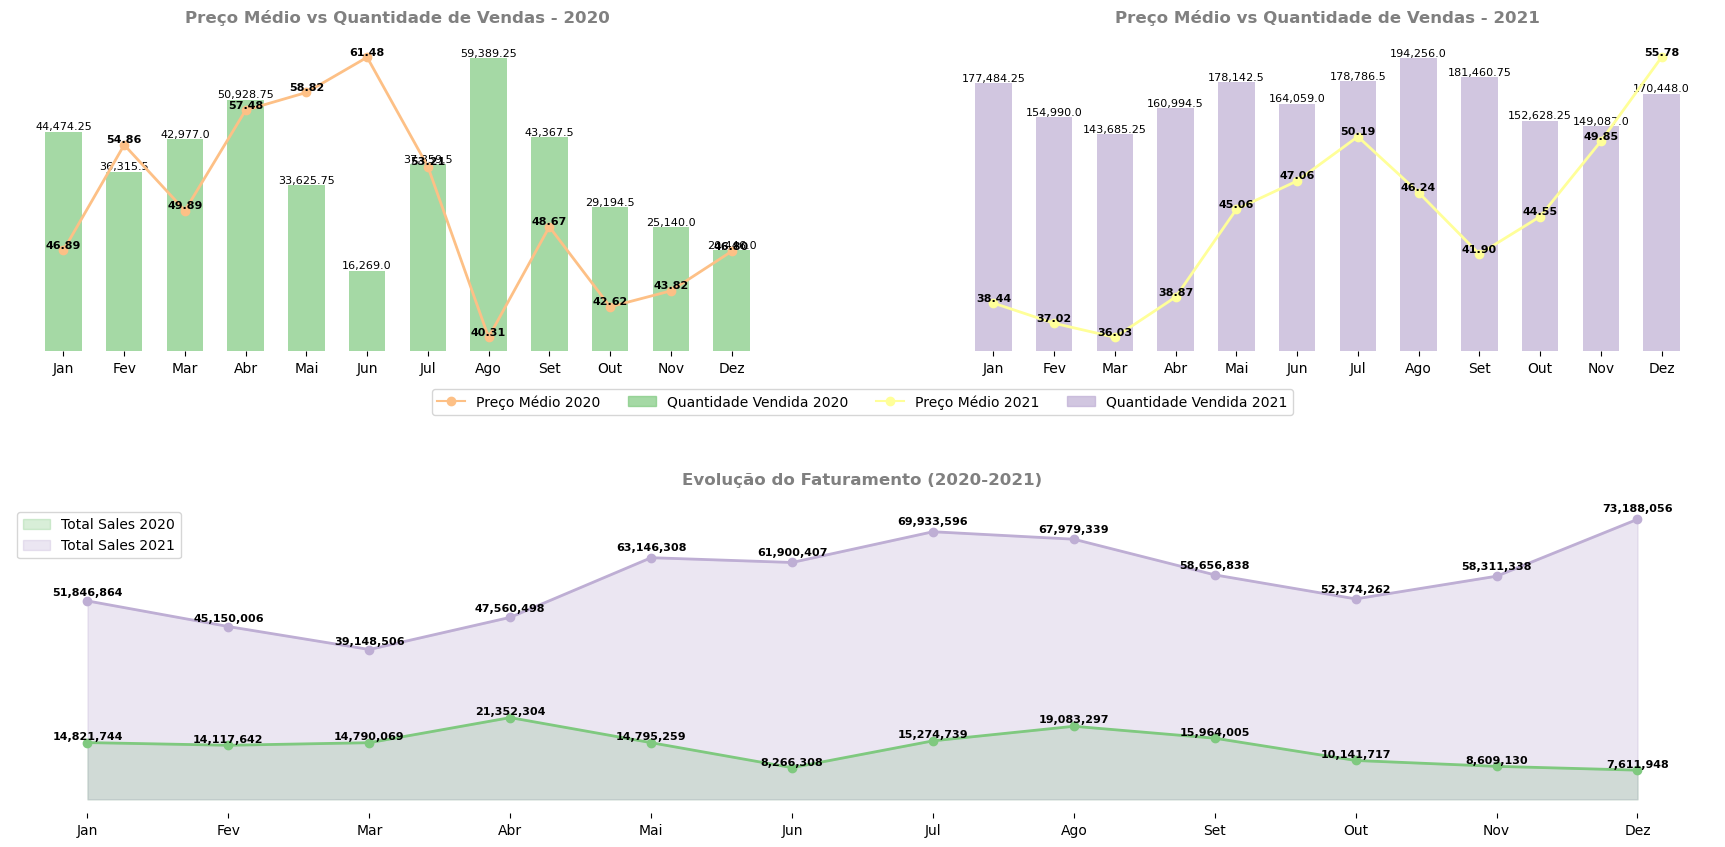

In [61]:
# Criar o mosaico com subgráficos (1 linha, 2 colunas)
mosaico = "AB;CC"
fig = plt.figure(figsize=(22, 10))
espacamento = {'wspace': 0.2, 'hspace': 0.5}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

ax1 = axs['A']
ax2 = axs['B']
ax3 = axs['C']  

# Cores para os gráficos
cores_barras = ['C0', 'C1']
cores_linhas = ['C2', 'C3']
cores_anos = {2020: 'C0', 2021: 'C1'}  # Cores para o gráfico de área

# Criar os gráficos para 2020 e 2021
for i, ano in enumerate([2020, 2021]):
    ax1 = axs['A' if ano == 2020 else 'B']  # Define o eixo correto do mosaico
    
    # Filtrar os dados para o ano atual
    dados_preco = preco_medio_mensal[preco_medio_mensal['Ano'] == ano]
    dados_vendas = quantidade_vendida_mensal[quantidade_vendida_mensal['Ano'] == ano]

    # Criar as barras para a Quantidade Vendida
    ax1.bar(dados_vendas['Mês'], dados_vendas['Units Sold'], color=cores_barras[i], alpha=0.7, width=0.6)

    # Adicionar rótulos acima das barras
    for j, valor in enumerate(dados_vendas['Units Sold']):
        ax1.text(dados_vendas['Mês'].iloc[j], valor, f"{valor:,}", ha='center', va='bottom', fontsize=8)

    ax1.set_ylabel('')
    ax1.set_yticks([])  
    ax1.tick_params(left=False)  
    ax1.set_xticks(range(1, 13))
    ax1.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])

    # Criar o segundo eixo Y para o Preço Médio
    ax2 = ax1.twinx()
    ax2.plot(dados_preco['Mês'], dados_preco['Price per Unit'], marker='o', color=cores_linhas[i], linewidth=2)
    
    # Adicionar rótulos acima dos pontos da linha
    for j, valor in enumerate(dados_preco['Price per Unit']):
        ax2.text(dados_preco['Mês'].iloc[j], valor, f"{valor:.2f}", ha='center', va='bottom', fontsize=8, fontweight='bold')

    ax2.set_ylabel('')
    ax2.set_yticks([])  
    ax2.tick_params(right=False)  

    # Configurações do gráfico
    ax1.set_xlabel('')
    ax1.set_title(f'Preço Médio vs Quantidade de Vendas - {ano}', fontsize=12, weight='bold', pad=15, color='gray')

    # Remover o box (spines) manualmente para ax1 e ax2
    for spine in ['top', 'right', 'left', 'bottom']:
        ax1.spines[spine].set_visible(False)
        ax2.spines[spine].set_visible(False)

# Adicionar legenda dos gráficos de barras
handles = [
    plt.Line2D([0], [0], color=cores_linhas[0], marker='o', linestyle='-', label='Preço Médio 2020'),
    plt.Rectangle((0, 0), 1, 1, color=cores_barras[0], alpha=0.7, label='Quantidade Vendida 2020'),
    plt.Line2D([0], [0], color=cores_linhas[1], marker='o', linestyle='-', label='Preço Médio 2021'),
    plt.Rectangle((0, 0), 1, 1, color=cores_barras[1], alpha=0.7, label='Quantidade Vendida 2021')
]

plt.legend(handles=handles, loc='upper center', bbox_to_anchor=(-0.1, -0.1), ncol=4)

# -------------------------------------------------------------------------------------------------------
# Criar o gráfico de área para o Total Sales (ax3)
for ano in [2020, 2021]:
    dados_ano = total_sales_mensal[total_sales_mensal['Ano'] == ano]

    # Criar área preenchida
    ax3.fill_between(dados_ano['Mês'], dados_ano['Total Sales'], color=cores_anos[ano], alpha=0.3, label=f'Total Sales {ano}')
    
    # Adicionar pontos sobre a linha
    ax3.plot(dados_ano['Mês'], dados_ano['Total Sales'], marker='o', color=cores_anos[ano], linewidth=2)
    
    # Adicionar rótulos acima dos pontos
    for j, valor in enumerate(dados_ano['Total Sales']):
        ax3.text(dados_ano['Mês'].iloc[j], valor * 1.02, f"{valor:,.0f}", 
                 ha='center', va='bottom', fontsize=8, fontweight='bold')

# Configurações do gráfico de Total Sales
ax3.set_xticks(range(1, 13))
ax3.set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
ax3.set_xlabel("")
ax3.set_ylabel("")
ax3.set_title("Evolução do Faturamento (2020-2021)", fontsize=12, weight='bold', pad=15, color='gray')

# Remover ticks do eixo Y
ax3.set_yticks([])
ax3.tick_params(left=False)

# Adicionar grid e legenda
ax3.grid(axis='y', linestyle='--', alpha=0.7)
ax3.legend(loc='upper left')

# Ajustar layout para evitar sobreposição
plt.subplots_adjust(wspace=0.3, hspace=0.4)

# Remover o box (spines) de ambos os eixos
for spine in ['top', 'right', 'left', 'bottom']:
    ax1.spines[spine].set_visible(False)
    ax2.spines[spine].set_visible(False)
    ax3.spines[spine].set_visible(False)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_faturamento_preco_medio.png", dpi=200, bbox_inches='tight')

plt.show()

### Distribuição das Vendas por Canal (2020 vs. 2021)

Nesta análise, foram comparadas as vendas pelos diferentes **canais de venda** (In-store, Online e Outlet) ao longo dos anos **2020 e 2021**. Os gráficos mostram a participação percentual de cada canal em relação ao total de vendas mensais.

#### 1. Mudanças nos Padrões de Venda
Em **2020**, houve grande variação na distribuição das vendas entre os canais.
  - **Outlet** liderando no início do ano e voltando a crescer no final.
  - **In-store** teve picos abruptos, principalmente em **junho e julho**.
  - **Online** manteve-se mais estável, com participação crescente ao longo do tempo.

Em **2021**, a distribuição dos canais se tornou **mais equilibrada e previsível**:
  - **Vendas online cresceram consistentemente**, tornando-se o principal canal ao longo do ano.
  - **In-store e Outlet** mantiveram participação estável, sem as variações extremas observadas no ano anterior.

#### 2. Insights e Tendências
- O crescimento do **e-commerce** foi evidente em 2021, consolidando-se como o principal canal de vendas.
- A **instabilidade das vendas presenciais em 2020** sugere impacto de fatores externos, possivelmente relacionados a restrições de mobilidade.
- Em 2021, a **distribuição mais equilibrada** entre os canais indica que a empresa conseguiu ajustar suas operações e fortalecer sua presença digital.

Esses padrões reforçam a **importância do canal online** e indicam uma **necessidade de otimização do mix de canais** para melhor atender à demanda do mercado.

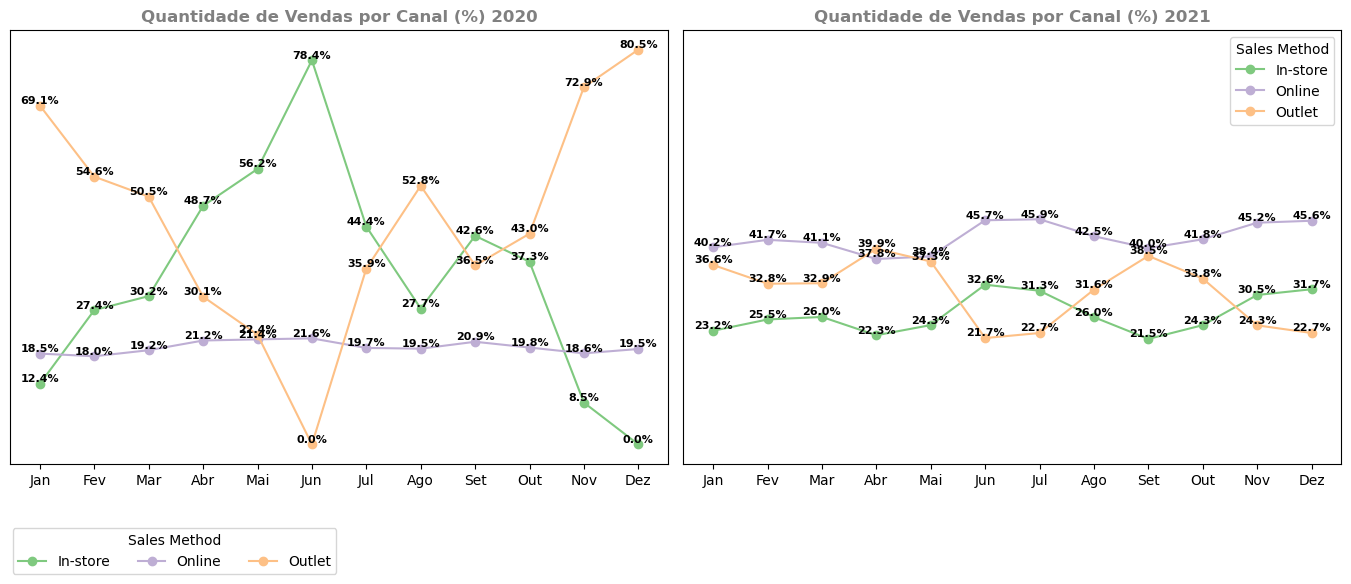

In [62]:
# Filtrar os dados para 2020 e 2021 e agrupar por Mês e Sales Method
vendas_mensais_canal_2020 = df_adidas[df_adidas['Ano'] == 2020].groupby(['Mês', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)
vendas_mensais_canal_2021 = df_adidas[df_adidas['Ano'] == 2021].groupby(['Mês', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)

# Calcular o percentual de vendas por canal para cada mês (em relação ao total de vendas de cada mês)
vendas_mensais_canal_2020_pct = vendas_mensais_canal_2020.apply(lambda x: (x / x.sum()) * 100, axis=1)
vendas_mensais_canal_2021_pct = vendas_mensais_canal_2021.apply(lambda x: (x / x.sum()) * 100, axis=1)

# Criar a figura e os subgráficos (1 linha, 2 colunas)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6), sharey=True)

# Definir as cores para os canais
cores_canais = ['C0', 'C1', 'C2']

# Gráfico para 2020 (linha com valores em porcentagem)
for i, canal in enumerate(vendas_mensais_canal_2020_pct.columns):
    axes[0].plot(vendas_mensais_canal_2020_pct.index, vendas_mensais_canal_2020_pct[canal], marker='o', color=cores_canais[i], label=canal)
    for x, y in zip(vendas_mensais_canal_2020_pct.index, vendas_mensais_canal_2020_pct[canal]):
        axes[0].text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

axes[0].set_title('Quantidade de Vendas por Canal (%) 2020', fontsize=12, weight='bold', color="gray")
axes[0].set_xlabel('')
axes[0].set_ylabel('')
axes[0].set_yticks([])  
axes[0].tick_params(left=False)  
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0)
axes[0].legend(title="Sales Method")
axes[0].grid(False)

# Gráfico para 2021 (linha com valores em porcentagem)
for i, canal in enumerate(vendas_mensais_canal_2021_pct.columns):
    axes[1].plot(vendas_mensais_canal_2021_pct.index, vendas_mensais_canal_2021_pct[canal], marker='o', color=cores_canais[i], label=canal)
    for x, y in zip(vendas_mensais_canal_2021_pct.index, vendas_mensais_canal_2021_pct[canal]):
        axes[1].text(x, y, f'{y:.1f}%', ha='center', va='bottom', fontsize=8, fontweight='bold')

axes[1].set_title('Quantidade de Vendas por Canal (%) 2021', fontsize=12, weight='bold', color="gray")
axes[1].set_xlabel('')
axes[1].set_ylabel('')
axes[1].set_yticks([])  
axes[1].tick_params(left=False)  
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'], rotation=0)
axes[1].legend(title="Sales Method")
axes[1].grid(False)

# Criar a legenda apenas uma vez, na parte inferior e centralizada
handles, labels = axes[0].get_legend_handles_labels()  # Pega a legenda do gráfico de 2020
axes[0].legend(handles, labels, title="Sales Method", loc='center', bbox_to_anchor=(0.25, -0.2), ncol=3) 

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\analise_percentual_canais.png", dpi=200, bbox_inches='tight')

# Ajuste do layout para evitar sobreposição
plt.tight_layout()

# Exibir o gráfico
plt.show()

### **Cálculo da Variação Percentual de Vendas entre 2020 e 2021 por Canal e Mês**

Nesta etapa, calculei a **variação percentual** de **unidades vendidas** entre os anos de **2020** e **2021** para cada **canal de vendas** (In-store, Online, Outlet) e para cada mês. Esse cálculo permite entender como as vendas evoluíram ao longo do tempo e comparar o desempenho de diferentes canais de vendas entre os dois anos.

Fica nítido o aumento escalar no canal **online** mas ainda sim, tivemos aumento nos outros 2 canais, só que com uma variação menor, com excessão de alguns meses, exemplo:

- mês 1 **(776,74%)** e 12 **(1970,45%)** no In-Store
- mês 5 **(879,71%)** no Outlet 

In [63]:
# Filtrar os dados para 2020 e 2021 e agrupar por Mês e Sales Method
vendas_mensais_canal_2020 = df_adidas[df_adidas['Ano'] == 2020].groupby(['Mês', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)
vendas_mensais_canal_2021 = df_adidas[df_adidas['Ano'] == 2021].groupby(['Mês', 'Sales Method'], observed=False)['Units Sold'].sum().unstack().fillna(0)

# Calcular a variação percentual de vendas de 2020 para 2021 para cada canal e mês
variacao_percentual = (vendas_mensais_canal_2021 - vendas_mensais_canal_2020) / vendas_mensais_canal_2020 * 100

variacao_percentual_formatado = variacao_percentual.round(2)

print(variacao_percentual_formatado)

Sales Method  In-store   Online  Outlet
Mês                                    
1               648.54   766.73  111.29
2               296.99   890.46  156.13
3               187.37   615.61  117.49
4                44.63   464.21  318.62
5               129.44   848.28  783.16
6               319.22  2031.69     inf
7               233.11  1002.12  199.05
8               206.39   611.49   95.72
9               111.55   700.07  340.68
10              241.30  1007.27  311.48
11             2018.41  1343.65   97.63
12                 inf  1854.34  135.22


# Análise Descritiva (Estatística)

## **Análise de Distribuição das Unidades Vendidas**

Nesta etapa, realizei uma análise sobre a **distribuição das unidades vendidas**, utilizando um **histograma** para visualizar como as vendas estão agrupadas em diferentes faixas. A partir dessa análise, consegui entender melhor a **concentração das vendas** e identificar **padrões** no comportamento das unidades vendidas ao longo do tempo.

1. **Definição das Faixas de Unidades Vendidas**:
   Utilizei a função **`np.histogram_bin_edges()`** para definir as **faixas de valores** (bins) com base no método de **Sturges**, que calcula automaticamente o número ideal de intervalos para representar a distribuição. Isso me forneceu **intervalos ajustados** para as unidades vendidas, com a **largura de cada intervalo** sendo calculada e arredondada para garantir uma distribuição mais uniforme dos dados.

2. **Histograma com Kernel Density Estimation (KDE)**:
   Criei um **histograma** das unidades vendidas utilizando os **bins definidos** e apliquei um **KDE** para suavizar a distribuição e visualizar melhor a **tendência central**. A linha de **KDE** foi customizada com uma cor diferente, permitindo observar com clareza a **forma da distribuição** das unidades vendidas.

3. **Distribuição de Frequências**:
   Utilizei a função **`tabela_distribuicao_frequencias()`** para calcular a **frequência das unidades vendidas** dentro dos intervalos definidos. Isso me permitiu entender em detalhes como as **unidades vendidas** estão distribuídas ao longo das faixas, identificando **quais faixas têm maior participação** nas vendas totais.

In [64]:
bins_vendas = np.histogram_bin_edges(df_adidas["Units Sold"], bins="sturges")

bins_vendas

array([  0.        ,  55.86666667, 111.73333333, 167.6       ,
       223.46666667, 279.33333333, 335.2       , 391.06666667,
       446.93333333, 502.8       , 558.66666667, 614.53333333,
       670.4       , 726.26666667, 782.13333333, 838.        ])

In [65]:
tamanho_intervalo = bins_vendas[1:] - bins_vendas[:-1]
tamanho_intervalo_inteiro = np.zeros(len(bins_vendas))
tamanho_intervalo_inteiro[1:] = np.ceil(tamanho_intervalo)

bins_arredondados_vendas = bins_vendas[0] + np.cumsum(tamanho_intervalo_inteiro)

bins_arredondados_vendas

array([  0.,  56., 112., 168., 224., 280., 336., 392., 448., 504., 560.,
       616., 672., 728., 784., 840.])

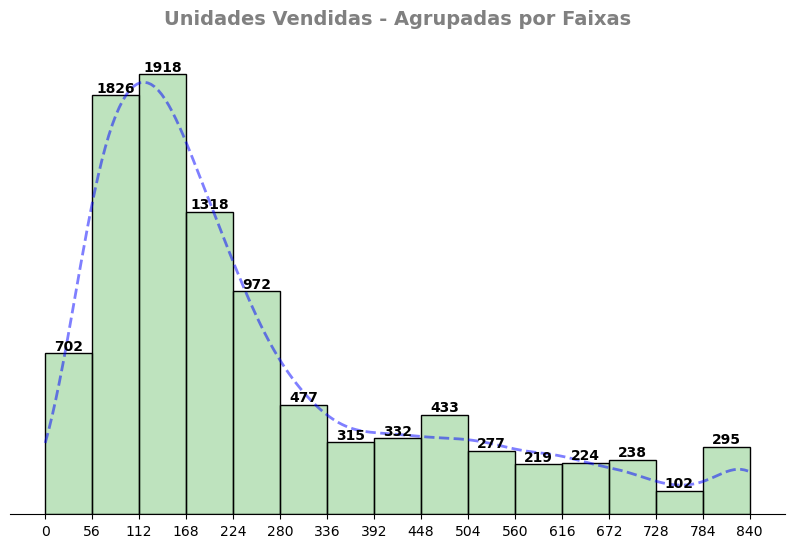

In [66]:
plt.figure(figsize=(10, 6))

# Criando o histograma com KDE
h = sns.histplot(
    data=df_adidas, 
    x="Units Sold", 
    bins=bins_arredondados_vendas, 
    color="C0", 
    kde=True
)

# Mudando a cor do KDE após o gráfico ser criado
h.lines[0].set_color('blue')
h.lines[0].set_linestyle('--')
h.lines[0].set_linewidth(2)
h.lines[0].set_alpha(0.5)

# Adicionando rótulos nas barras
for barra in h.containers:
    h.bar_label(barra, color="black", fontweight="bold", fontsize=10)

# Customizando o gráfico
h.set_xticks(bins_arredondados_vendas)
h.set_ylabel('')
h.set_xlabel('')
h.set_yticks([])

# Removendo o box (spines) do gráfico
h.spines['top'].set_visible(False)
h.spines['right'].set_visible(False)
h.spines['left'].set_visible(False)

h.set_title('Unidades Vendidas - Agrupadas por Faixas', fontsize=14, weight='bold', pad=20, color='gray')

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\histograma_unidades_vendidas.png", dpi=200, bbox_inches='tight')

plt.show()

### **Cálculo de Skewness (Assimetria)**:
O valor de **skewness** (1.23) revela que a distribuição das **unidades vendidas** tem uma **cauda à direita**, o que significa que a maior parte das vendas está concentrada em intervalos **mais baixos**, mas com alguns picos de vendas muito **altos**. Esse tipo de assimetria indica que a maioria dos produtos foi vendida em **quantidades menores**, enquanto alguns poucos produtos se destacaram com vendas significativamente mais altas. No nosso caso, esse comportamento é importante porque indica que, apesar de uma **grande quantidade de produtos vendidos**, há um pequeno número de **produtos de alto desempenho** que impactaram consideravelmente o total de vendas, o que pode ser vital para **estratégias de marketing e estoque**.

### **Cálculo de Kurtosis (Curtose)**:
A **curtose** (0.74) calculada sugere que a distribuição das **unidades vendidas** apresenta um **pico mais acentuado**, o que significa que a maior parte das vendas está concentrada nos **intervalos iniciais** (ou seja, nos **valores mais baixos de unidades vendidas**), com uma **diminuição acentuada** conforme as vendas aumentam. Isso implica que a maioria dos produtos vendeu **quantidades moderadas ou pequenas**, mas com **alguns poucos produtos** registrando grandes vendas. Em termos estratégicos, esse padrão pode indicar que o estoque de produtos com **baixas unidades vendidas** precisa ser **ajustado**, enquanto os produtos com **alto volume de vendas** devem receber mais atenção em termos de **produção e marketing**.

In [67]:
df_adidas["Units Sold"].skew()

np.float64(1.2671750854466552)

In [68]:
df_adidas["Units Sold"].kurtosis()

np.float64(0.7303898458435754)

In [69]:
df_adidas["Units Sold Interval"] = pd.cut(
    df_adidas["Units Sold"],
    bins=bins_arredondados_vendas, 
    right=False
)

df_adidas

3,Retailer,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,Log_Total_Sales,Log_Units_Sold,Log_Operating_Profit,Log_Operating_Margin,Log_Price_per_Unit,Ano,Mês,Units Sold Interval
Invoice Date,,,,,,,,,,,,,,,,,,,
2020-01-01,Foot Locker,Northeast,New York,New York,Men's Street Footwear,50,838.0,441491.0,152344.0,0.50,In-store,1.599706,1.743453,1.633285,0.872145,0.484677,2020,1,"[784.0, 840.0)"
2020-01-01,Foot Locker,Northeast,Pennsylvania,Philadelphia,Women's Apparel,70,275.0,206250.0,61875.0,0.30,Outlet,1.238504,0.492703,1.137322,-1.376855,1.567958,2020,1,"[224.0, 280.0)"
2020-01-01,Foot Locker,Northeast,Pennsylvania,Philadelphia,Women's Apparel,53,83.0,4399.0,1407.0,0.32,Outlet,-0.811603,-1.045706,-1.001684,-1.136909,0.671824,2020,1,"[56.0, 112.0)"
2020-01-01,Foot Locker,Northeast,New York,New York,Men's Street Footwear,47,336.0,15792.0,9633.0,0.60,Online,-0.130650,0.750939,0.085713,1.886445,0.286180,2020,1,"[336.0, 392.0)"
2020-01-01,Foot Locker,Northeast,New York,New York,Men's Street Footwear,34,384.0,13056.0,6789.0,0.52,Outlet,-0.232019,0.923146,-0.112101,1.080310,-0.747985,2020,1,"[336.0, 392.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31,Foot Locker,Northeast,Pennsylvania,Philadelphia,Men's Apparel,70,175.0,122500.0,42875.0,0.35,Outlet,0.960906,-0.089144,0.929910,-0.783721,1.567958,2021,12,"[168.0, 224.0)"
2021-12-31,Foot Locker,Northeast,Pennsylvania,Philadelphia,Men's Apparel,63,47.0,2961.0,1362.0,0.46,Online,-1.022470,-1.769420,-1.020050,0.447357,1.228107,2021,12,"[0.0, 56.0)"
2021-12-31,Foot Locker,Northeast,Pennsylvania,Philadelphia,Men's Apparel,46,56.0,2576.0,1004.0,0.39,Outlet,-1.096662,-1.547177,-1.192337,-0.324821,0.217247,2021,12,"[56.0, 112.0)"


In [70]:
df_adidas_vendas_freq = tabela_distribuicao_frequencias(df_adidas, "Units Sold Interval")

df_adidas_vendas_freq

,frequencia,frequencia_relativa,frequencia_acumulada,frequencia_relativa_acumulada
Units Sold Interval,,,,
"[0.0, 56.0)",702,0.072761,702,0.072761
"[56.0, 112.0)",1826,0.189262,2528,0.262023
"[112.0, 168.0)",1918,0.198798,4446,0.460821
"[168.0, 224.0)",1318,0.136609,5764,0.597430
"[224.0, 280.0)",972,0.100746,6736,0.698176
"[280.0, 336.0)",477,0.049440,7213,0.747616
"[336.0, 392.0)",315,0.032649,7528,0.780265
"[392.0, 448.0)",332,0.034411,7860,0.814677
"[448.0, 504.0)",433,0.044880,8293,0.859556


### Análise de Regressão Linear: Unidades Vendidas e Outras Variáveis

Foram realizadas regressões lineares para entender a relação entre **unidades vendidas** e outras variáveis financeiras. A seguir, os principais resultados:

#### 1. Unidades Vendidas vs Preço por Unidade
- **Correlação fraca** (r = 0.25), indicando pouca relação entre as variáveis.
- **R² = 6.26%**, ou seja, as unidades vendidas explicam pouco da variação no preço.
- **p-value muito baixo**, sugerindo que a relação é estatisticamente significativa, mas sem grande impacto prático.

#### 2. Unidades Vendidas vs Vendas Totais
- **Correlação forte** (r = 0.91), mostrando uma relação direta entre volume de vendas e faturamento.
- **R² = 83.69%**, indicando que a maior parte da variação das vendas totais é explicada pelas unidades vendidas.
- **p-value = 0**, confirmando a relevância estatística da relação.

#### 3. Unidades Vendidas vs Lucro Operacional
- **Correlação forte** (r = 0.91), mostrando que o aumento no volume de vendas impacta diretamente o lucro operacional.
- **R² = 82.82%**, sugerindo que a variação no lucro está altamente relacionada ao número de unidades vendidas.
- **p-value = 0**, reforçando a significância da relação.

#### 4. Unidades Vendidas vs Margem Operacional
- **Correlação negativa fraca** (r = -0.31), sugerindo que maiores volumes de vendas podem reduzir ligeiramente a margem operacional.
- **R² = 9.73%**, indicando que outros fatores influenciam a margem além do volume vendido.
- **p-value muito baixo**, estatisticamente relevante, mas com impacto limitado.

### Conclusão
- **Vendas totais e lucro operacional** têm uma **relação forte** com o número de unidades vendidas.
- **Preço por unidade e margem operacional** apresentam **correlações mais fracas**, sugerindo que **fatores externos** influenciam essas variáveis.
- Os insights ajudam na **definição de preços, estratégias de vendas e planejamento financeiro** da empresa.

In [71]:
# Definir as colunas numéricas para análise
colunas_analise = [
    "Price per Unit", "Operating Margin"
]

# Criar um dicionário para armazenar os resultados das regressões
resultados_regressao = {}

# Avaliar a relação de 'Units Sold' com as outras colunas numéricas
for coluna in colunas_analise:
        resultado_regressao = linregress(df_adidas["Units Sold"], df_adidas[coluna])
        
        # Armazenar os resultados no dicionário
        resultados_regressao[coluna] = {
            'r_value': resultado_regressao.rvalue,
            'p_value': resultado_regressao.pvalue,
            'r_squared': resultado_regressao.rvalue ** 2,
            'stderr': resultado_regressao.stderr,
            'intercept_stderr': resultado_regressao.intercept_stderr
        }
    
# Exibir os resultados da regressão
for coluna, resultado in resultados_regressao.items():
    print(f"Análise de regressão entre 'Units Sold' e '{coluna}':")
    print(f"  Coeficiente de correlação (r-value): {resultado['r_value']:.4f}")
    print(f"  Coeficiente de determinação (R²): {resultado['r_squared']:.4f}")
    print(f"  p-value: {resultado['p_value']:.4e}")
    print(f"  Erro padrão da inclinação (stderr): {resultado['stderr']:.4e}")
    print(f"  Erro padrão do intercepto (intercept_stderr): {resultado['intercept_stderr']:.4e}")
    print()

Análise de regressão entre 'Units Sold' e 'Price per Unit':
  Coeficiente de correlação (r-value): 0.2606
  Coeficiente de determinação (R²): 0.0679
  p-value: 1.6949e-149
  Erro padrão da inclinação (stderr): 6.3446e-04
  Erro padrão do intercepto (intercept_stderr): 2.0655e-01

Análise de regressão entre 'Units Sold' e 'Operating Margin':
  Coeficiente de correlação (r-value): -0.3160
  Coeficiente de determinação (R²): 0.0998
  p-value: 1.3241e-222
  Erro padrão da inclinação (stderr): 4.2753e-06
  Erro padrão do intercepto (intercept_stderr): 1.3918e-03



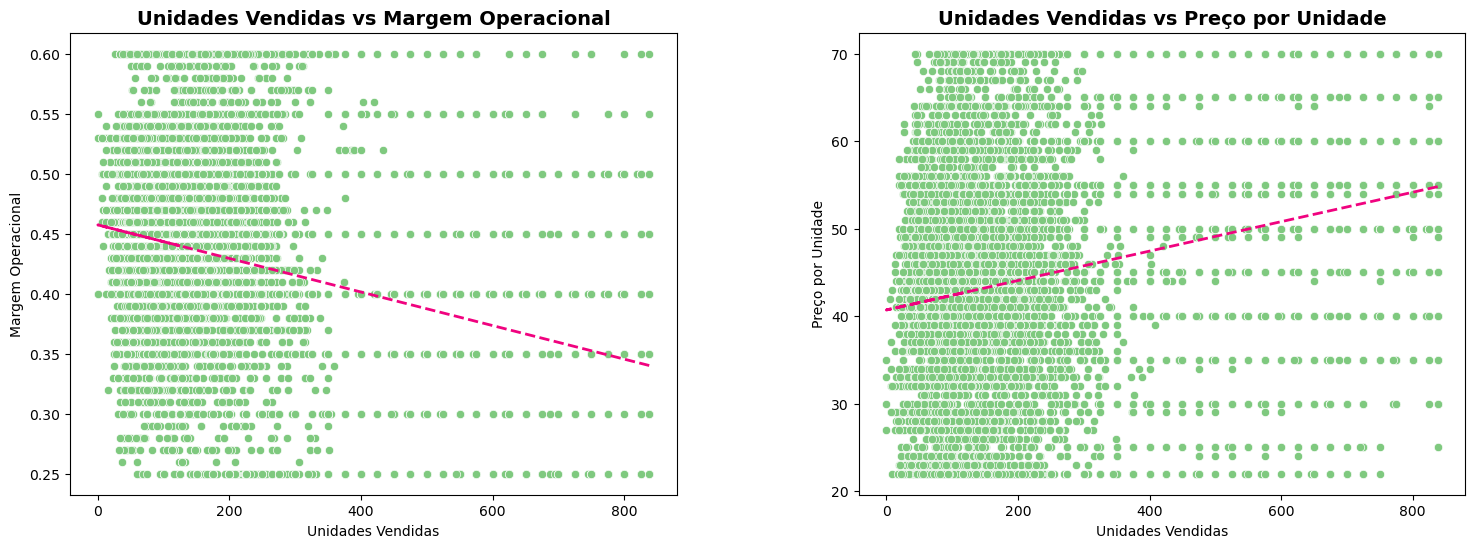

In [72]:
# Criar o mosaico para exibir os gráficos (2 linhas, 2 colunas)
mosaico = "AB"
fig = plt.figure(figsize=(18, 6))
espacamento = {'wspace': 0.3, 'hspace': 0.4}
axs = fig.subplot_mosaic(mosaico, gridspec_kw=espacamento)

# Gráfico 1: Units Sold vs Operating Margin
sns.scatterplot(data=df_adidas, x="Units Sold", y="Operating Margin", ax=axs['A'])
axs['A'].set_title("Unidades Vendidas vs Margem Operacional", fontsize=14, weight='bold')
axs['A'].set_xlabel("Unidades Vendidas")
axs['A'].set_ylabel("Margem Operacional")

# Calcular e adicionar a linha de regressão para o gráfico 'A'
resultado_regressao = linregress(df_adidas["Units Sold"], df_adidas["Operating Margin"])
axs['A'].plot(
    df_adidas["Units Sold"], 
    resultado_regressao.intercept + resultado_regressao.slope * df_adidas["Units Sold"], 
    color="C5", linestyle="--", linewidth=2
)

# Gráfico 2: Units Sold vs Preço por Unidade
sns.scatterplot(data=df_adidas, x="Units Sold", y="Price per Unit", ax=axs['B'])
axs['B'].set_title("Unidades Vendidas vs Preço por Unidade", fontsize=14, weight='bold')
axs['B'].set_xlabel("Unidades Vendidas")
axs['B'].set_ylabel("Preço por Unidade")

# Calcular e adicionar a linha de regressão para o gráfico 'B'
resultado_regressao = linregress(df_adidas["Units Sold"], df_adidas["Price per Unit"])
axs['B'].plot(
    df_adidas["Units Sold"], 
    resultado_regressao.intercept + resultado_regressao.slope * df_adidas["Units Sold"], 
    color="C5", linestyle="--", linewidth=2
)

plt.savefig(r"C:\Users\Camilo_Bica\data_science\portifolio\adidas\imagens\regressao_linear.png", dpi=200, bbox_inches='tight')

plt.show()

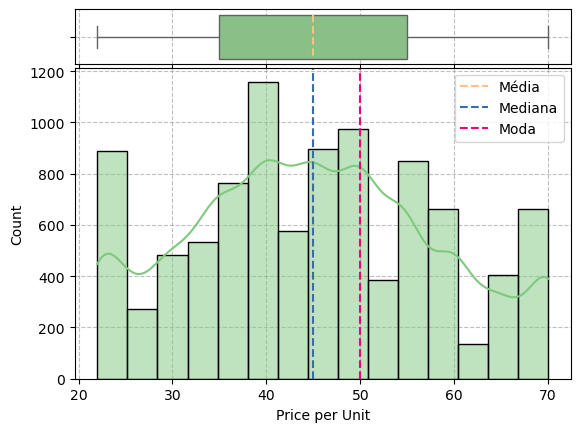

In [73]:
composicao_histograma_boxplot(df_adidas, "Price per Unit")

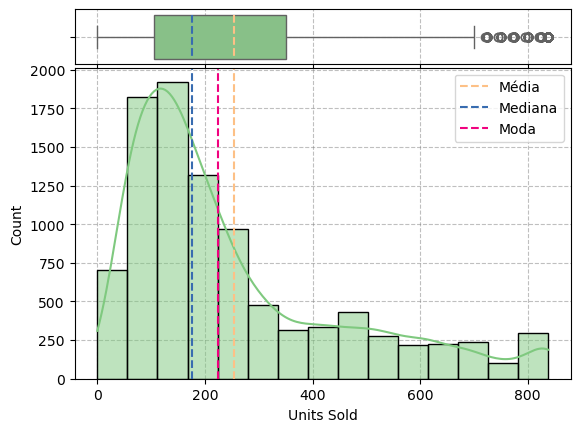

In [74]:
composicao_histograma_boxplot(df_adidas, "Units Sold")

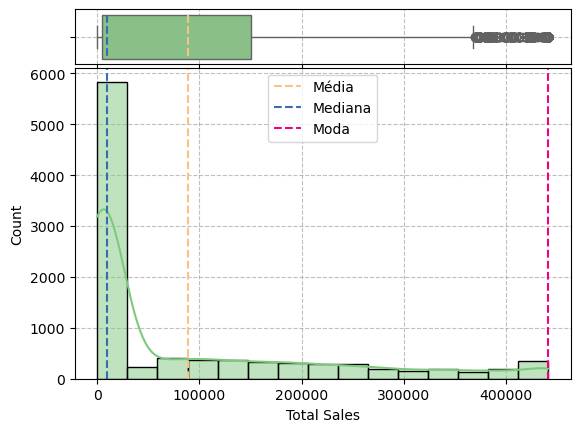

In [75]:
composicao_histograma_boxplot(df_adidas, "Total Sales")

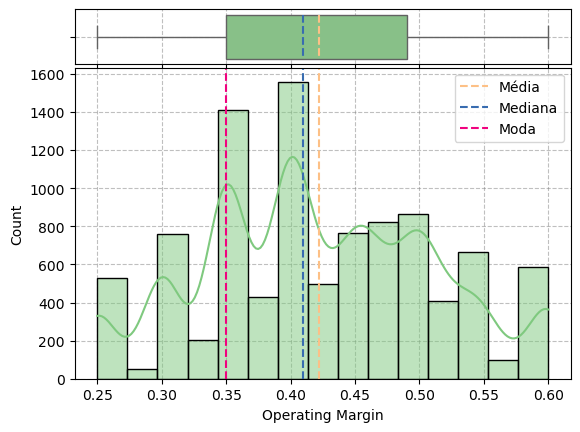

In [76]:
composicao_histograma_boxplot(df_adidas, "Operating Margin")